# Introdução à Programação em Python
## Notebook 11 - Exemplos complementares
## Carlos Caleiro, Jaime Ramos, Francisco M. Dionísio
## Dep. Matemática, IST - 2016

(actualizado em 22 de Fevereiro de 2019)

Neste capítulo exploramos um conjunto de problemas complementares de programação, independentes entre si mas de interesse geral, que são não só exemplos interessantes de programação em *Python*, explorando as suas diferentes dimensões, mas também de abordagens interessantes à resolução de problemas científicos, representação de conhecimento e interactividade, algoritmos e estruturas de dados.

# 1. Biocomputação

A biocomputação pode ser definida como o processo de construir computadores e programas de computador que usam materiais biológicos, que copiam organismos biológicos ou que são utilizados para estudar organismos biológicos. Em [Dr. Dobbs](http://www.drdobbs.com/what-is-biocomputing/184408530) propõe-se a seguinte definição simplificada: "*It is a biologically inspired approach to creating software.*"

Esta abordagem permite muitas vezes desenvolver programas eficientes para calcular de forma expedita soluções aproximadas de problemas para os quais não se conhece um método eficiente para calcular a solução exacta.

Nesta secção, apresenta-se um exemplo simples de aplicação destas técnicas. Considere-se o problema de determinar o máximo de uma função real de variável real num intervalo pré-fixado. Este é um problema de enunciado muito simples e para o qual existem algoritmos clássicos para o resolver (e.g. o método de Newton-Raphson, que é estudado na disciplina de Matemática Computacional), mas que nos permite concentrar nas técnicas de biocomputação.

## Descrição do problema

Pretende-se desenvolver em Python um programa para encontrar o máximo de uma função $f$ num intervalo $[x_1,x_2]$ de acordo com princípios de biocomputação.

A ideia é constituir uma população inicial de $Ni$ indivíduos dispostos aleatoriamente no intervalo de pesquisa e fazê-la evoluir até ao instante final $T$. Cada indivíduo evolui de acordo com um de três mecanismos aleatórios exponenciais: **deslocamento**, **reprodução** e **morte**. De um modo geral, durante a vida de um indivíduo vão ocorrer diversos eventos de **deslocamento** e de **reprodução** até ocorrer o evento de **morte**. A frequência destes eventos vai ser ditada pelo *conforto* de cada indivíduo. O conforto mede o grau de adaptação de um indivíduo ao meio. Recorde-se que cada indivíduo se encontra numa certa posição do intervalo, e como o nosso objectivo é encontrar o máximo da função,  quanto maior for o valor da função $f$ nessa posição maior será o conforto do indivíduo. Para um indivíduo na posição $x$, o seu conforto será dado por:

$$
conf(x)=e^{(f(x)-A)/B}
$$

em que $A$ e $B$ são parâmetros do programa e vão permitir algum controlo sobre a função de conforto. Não é difícil observar que o conforto de cada indivíduo cresce exponencialmente com o valor da função $f$.

Com que frequência devem ocorrer os vários eventos de cada indivíduo? Como se disse anteriormente, estes eventos ocorrem de acordo com uma distribuição exponencial. Então, qual deverá ser o tempo médio destas variáveis aleatórias? Faz sentido que o conforto de cada indivíduo afecte estes tempos médios. Por exemplo, faz sentido assumir que indivíduos com maior conforto vivam mais tempo e se reproduzam mais do que indivíduos com menor conforto. 

No caso do evento de morte, e para um indivíduo na posição $x$, vamos considerar o *tempo médio de vida*:

$$
\mu_m(x) = \frac{T}{\nu_m}\times conf(x)
$$

em que $\nu_m$ é um parâmetro do programa. Esta expressão dá-nos um valor para o tempo médio de vida relativo ao tempo total de simulação $T$. Observa-se facilmente que quanto maior for o conforto de um indivíduo maior será o tempo médio de vida. Note-se que este é um valor que é determinado à nascença, altura em que é programado o evento de morte.

Em relação à reprodução, vamos assumir que quanto maior for o conforto de um indivíduo maior será a sua taxa de reprodução, ou seja, menor será o tempo entre cada dois eventos de reprodução. Assim, para um indivíduo na posição $x$, vamos considerar o *tempo médio reprodução*:

$$
\mu_r(x)=\frac{\mu_m}{\nu_r}\times conf(x)^{-2}\times \frac{N}{Ni}
$$

em que $\nu_r$ é um parâmtro do programa e $N$ é o tamanho da população no momento da reprodução. Observa-se que quanto maior for o conforto menor será o tempo médio de reprodução. Acrescentou-se também um factor de ponderação relacionado com a população. Se, num determinado instante, a população for muito grande é natural esperar que a taxa de reprodução decaia (visto que há mais indivíduos a disputar os mesmos recursos), ou seja, que o tempo entre reproduções aumente o que é imposto pelo factor $\frac{N}{Ni}$ na definição do tempo médio de reprodução. Para a  reprodução, é escolhido como parceiro o indivíduo com melhor conforto de entre os 3 indivíduos mais próximos. Da reprodução, surge um terceiro indivíduo colocado aleatoriamente na vizinhança dos progenitores. 

Finalmente, vamos considerar que indivíduos com conforto elevado se vão deslocar pouco enquanto indivíduos com menor conforto se vão deslocar mais, à procura de uma posição melhor, ou seja, quanto maior for o conforto maior será o tempo  entre deslocamentos. Assim, para um indivíduo na posição $x$, vamos considerar o *tempo médio de deslocamento*:

$$
\mu_d(x)=\frac{\mu_m}{\nu_d}\times conf(x)
$$

em que, novamente, $\nu_d$ é um parâmetro do programa. A nova posição do indivíduo é um valor aleatório uniforme no intervalo de amplitude $\Delta$ para cada um dos lados. Como é necessário ter em atenção que a nova posição seja um valor no intervalo de pesquisa, o intervalo para a nova posição é:

$$
[\max(x_1,x-\Delta),min(x_2,x+\Delta)]
$$

onde $\Delta=max(10^{-4},\frac{x_2-x_1}{2}\times conf(x)^{-12}$. Novamente, quanto maior for o conforto, menor será a amplitude do intervalo, uma vez que indíviduos com conforto mais elevado já se encontram numa posição boa e não vão querer alargar muito a busca de uma posição melhor.

No fim da evolução, escolhe-se o indivíduo com maior conforto. A sua posição será a que melhor aproxima o máximo de $f$ de entre todos os indivíduos da população.

## Tipos de dados relevantes

Como seria de esperar, vamos resolver este problema recorrendo ao método de programação por camadas centrado nos dados. Começamos por isso por identifcar os tipos de dados relevantes.

### Indivíduos

O tipo de dados indivíduo (`ind`) vai ser usado para armazenar toda a informação relevante acerca de cada um dos indivíduos:
- `po`: *posição* - posição actual do indivíduo. É determinada à nascença e actualizada após cada deslocamento.
- `tmor`: *tempo de morte* - tempo de morte. É determinado à nascença e fixa o tempo de vida do indivíduo. Não é alterado durante a simulação.
- `trep`: *tempo de reprodução* - próximo instante de reprodução de um indivíduo. Após a simulação deste evento de reprodução deverá ser programada a ocorrência do próximo evento de reprodução, de acordo com a descrição anterior.
- `tdes`: *tempo de deslocamento* - próximo instante de deslocamento. Após a simulação de um evento de deslocamento deverá ser programada a ocorrência do próximo evento de deslocamento, de acordo com a descrição anterior.
- `cf`: *conforto* - conforto actual do indivíduo. É determinado à nascença e actualizado após cada deslocamento.

As operações relevantes para este tipo de dados são:
- `__init__`:  a operação que cria uma nova instância da classe `ind`. Para criar um novo indivíduo, é necessário fornecer a informação relevente: posição, tempos e conforto.
- `pos`, `tm`, `tr`, `td` e `conf`: operações que permitem consultar as características do indivíduo: posição, tempo de morte, tempo de reprodução, tempo de deslocamento e conforto, respectivamente.
- `set_pos`, `set_tm`, `set_tr`, `set_td` e `set_conf`: operações que permitem alterar cada um dos valores dos atributos.
- `tmin`: operação que devolve o menor dos tempos dos três eventos que um indivíduo tem para realizar. Este valor é usado para determinar qual o próximo indivíduo a realizar um evento. Será aquele que tiver menor tempo mínimo.
- `evt`: operação que devolve  o tipo do evento que um indivíduo vai realizar a seguir: morte (`m`), reprodução (`r`) ou deslocamento (`d`). Será aquele que tiver o menor instante.
- `dist`: operação que recebe como argumento outro indivíduo e devolve a distância entre os dois.

A implementação do tipo `ind` vai ser feita recorrendo a classes. De acordo com a descrição anterior, obtemos a seguinte definição:

In [12]:
class ind:
    def __init__(self,p,tm,tr,td,c):
        self._po=p
        self._tmor=tm
        self._trep=tr
        self._tdes=td
        self._cf=c

    def pos(self):
        return self._po
    def tm(self):
        return self._tmor
    def tr(self):
        return self._trep
    def td(self):
        return self._tdes
    def conf(self):
        return self._cf     

    def set_pos(self,x):
        self._po=x
    def set_tm(self,t):
        self._tmor=t
    def set_tr(self,t):
        self._trep=t
    def set_td(self,t):
        self._tdes=t
    def set_conf(self,x):
        self._cf=x

    def tmin(self):
        return min(self._tmor,self._trep,self._tdes)
        
    def evt(self):
        m=self.tmin()
        if m == self._tmor:
            return 'm'
        elif m == self._trep:
            return 'r'
        else:
            return 'd'

    def dist(self,i):
        return abs(self._po-i.pos())

        
    def show(self):
        print("pos=%5.2f tm=%6.3f tr=%6.3f tr=%6.3f conf=%6.3f" \
              % (self._po,self._tmor,self._trep,self._tdes,self._cf))

É importante realçar, não é aqui que os valores dos atributos são calculados. Esses valores são calculados no simulador, de acordo com a descrição anterior, e são guardados num objecto de tipo `ind`. Os métodos agora definidos destinam-se apenas a consultar esses valores e actualizar esses valores. Veremos adiante como é que os valores dos diversos atributos são, de facto, calculados.

Acrescentou-se no fim, um método adicional, o método `show`, que não faz parte das operações sobre o tipo `ind`mas permite visualizar todas as característcas de um indivíduo. Este tipo de métodos é útil na  fase de depuração e de testes.

Vejamos alguns exemplos de utilização desta classe. Vamos criar um novo indivíduo na posição `2.5`, com tempo de morte `5.8`, tempo de reprodução `3.5`, tempo de deslocamento `1.7` e conforto `9.1`.

In [2]:
i1=ind(2.5,5.8,3.5,1.7,9.1)

Podemos calcular as suas características, usando os métodos acima. Por exemplo, consultar a posição e o tempo de deslocamento:

In [3]:
i1.pos()

2.5

In [4]:
i1.td()

1.7

Podemos alterar o tempo de deslocamento para 5.4:

In [5]:
i1.set_td(5.4)

In [6]:
i1.td()

5.4

Podemos observar o tempo mínimo, ou seja, qual dos três eventos tem menor tempo:

In [7]:
i1.tmin()

3.5

E podemos também determinar qual o tipo do evento a que este tempo corresponde:

In [8]:
i1.evt()

'r'

Concluímos assim que de entre os três eventos que este indivíduo tem para realizar, o próximo será um evento de reprodução, aquele que tem menor tempo. Consideremos mais um indivíduo, na posição `1.4`.

In [9]:
i2=ind(1.4,10.5,3.4,1.2,0.4)

Podemos calcular a distância entre `i1` e `i2`:

In [10]:
i1.dist(i2)

1.1

Como seria de esperar, se calcularmos a distância entre estes dois indivíduos a partir de `i2` o resultado é o mesmo:

In [11]:
i2.dist(i1)

1.1

Por fim, podemos observar as características de um  indivíduo através do método `show`:

In [12]:
i1.show()

pos= 2.50 tm= 5.800 tr= 3.500 tr= 5.400 conf= 9.100


### População

O tipo de dados população (`pop`) é onde vamos guardar todos os indivíduos activos. As operações relevantes para este tipo de dados são:
- `__init__`: a operação que cria uma nova  instância da classe `pop`, como uma população vazia.
- `addI(id)`: operação que acrescenta um indivíduo à população.
- `delI`: operação que remove o indivíduo com menor tempo da população.
- `nextI`: operação que devolve o indivíduo da população que vai realizar o próximo evento.
- `sizeP`: operação que devolve o tamanho da população, isto é, o número de indivíduos.
- `pair(id)`: operação que dado um indivíduo devolve o seu parceiro de reprodução, de acordo com as regras descritas acima. Como as características deste parceiro não vão ser alteradas, basta apenas devolver a sua posição, que é a única característica relevante para a reprodução.
- `best`: operação que devolve o indivíduo da população com melhor conforto. Tal como no caso da operação anterior, apenas vamos estar interessados na posição no indivíduo.

A implementação escolhida para este tipo de dados é uma lista de indivíduos em que estes são mantidos ordenados na população ordenados por tempo mínimo, ou seja, o primeiro indivíduo será sempre aquele que vai realizar o próximo evento. A definição da classe `pop` é a seguinte, cujo módulo deve incluir o módulo dos indivíduos:

In [13]:
import sys
sys.path.append('./modules/')

In [15]:
from ind import *

class pop:
    def __init__(self):
        self._list=[]
        
    def addI(self,id):
        self._list= [id1 for id1 in self._list if id1.tmin()<id.tmin()]+[id]+ \
               [id1 for id1 in self._list if id1.tmin()>=id.tmin()]                

    def delI(self):
        if len(self._list)>0:
            self._list=self._list[1:]
        else:
            print("Erro de delI! A populacao está vazia")
                
    def nextI(self):
        if len(self._list)>0:
            return self._list[0]
        else:
            print("Erro de nextI! A populacao está vazia")
  
    def size(self):
        return len(self._list)

          
    def pair(self,id):

        def f(x):
            return [id.dist(x),x.conf(),x.pos()]

        def proj2(t):
            return t[1:]

        dists=list(map(f,self._list))
        dists.sort()
        vizinhos=dists[:3]
        vizinhos=list(map(proj2,vizinhos))
        vizinhos.sort(reverse=True)
        return vizinhos[0][1]
        
    def best(self):

        def f(id):
            return [id.conf(),id.pos()]

        w=list(map(f,self._list))
        w.sort(reverse=True)
        return w[0][1]
        
    def showP(self):
        for i in self._list:
            i.show()  

A operação `addI` de adição de um elemento `id` à população é muito semelhante à operação para acresentar  um elemento à cadeia de acontecimentos pendentes, definida no capítulo de simulação discreta estocástica. Constrói-se uma lista com os indivíduos da população com menor tempo do que `id`, em seguida acrescenta-se `id`e por fim os restantes indivíduos da população, ou seja, aqueles com tempo maior do que `id`. Retirar o indivíduo com menor tempo da população resume-se a apagar o primeiro elemento da lista de indivíduos desde que esta não esteja vazia, uma vez que a lista está ordenada. A operação `pair` devolve o parceiro de reprodução. De acordo com as regras apresentadas acima, como parceiro de reprodução de um indivíduo é escolhido o indivíduo com melhor conforto de entre os 3 indivíduos mais próximos. Vamos recorrer a duas funções auxiliares. A função `f` que dado um indivíduo, cria um triplo com a distância desse indivíduo a `id`,  o seu conforto e a sua posição. A função `proj2` recebe um triplo e descarta a primeira posição, devolvendo as duas útlimas. A operação `pair` começa por construir uma lista `dists` de triplos `[distancia a id, conforto, posicao]` para cada um dos indivíduos na população. A seguir ordena esta lista por ordem crescente recorrendo ao método `sort` do tipo lista. Por defeito este método, quando aplicado a uma lista de listas, ordena a lista pela primeira posição das listas interiores. Neste caso, a lista irá ficar ordenada por distância, da menor para a maior, ou seja, os primeiros elementos da lista serão os indivíduos mais próximos de `id`. Destes, escolhem-se os três primeiros elementos da lista, os três indivíduos mais próximos de `id`. Neste momento, temos uma lista com três elementos, cada um dos quais é um triplo dos descritos atrás. Destes triplos, elimina-se a informação relativa à distância recorrendo à função `proj2`. A lista resultante volta a ser ordenada, por ordem decrescente, pela primeira posição das listas que a constituem. Neste caso, essa posição contém informação relativa ao conforto. Como a lista foi ordenada por ordem decrescente, na primeira posição encontra-se o indivíduo com melhor conforto. É a posição desse indivíduo que temos que devolver. Pare definir a operação `best` que calcula o indivíduo com melhor conforto na população começamos por definir uma função auxiliar que dado um indivíduo devolve o par `[conforto, posicao]`. Ao mapear pela população, obtemos a lista dos pares  `[conforto, posicao]` para todos os indivíduos da população. Em seguida, ordenamos esta lista por ordem decrescente. Novamente, recorda-se que  o método `sort` ordena listas de listas pela primeira posição das listas interiores. Assim, a lista fica ordenada por conforto, do melhor conforto para o pior. Basta devolver a posição na primeira posição dessa lista. Tal como no caso do tipo `ind`, inclui-se também  um método para apresentar o conteúdo de uma população. 

Ilustramos agora a utilização desta classe, assumindo que a classe `ind` se encontra disponível.

In [15]:
p=pop()

In [16]:
i1=ind(2.5,1.0,1.1,1.2,3.0)
i2=ind(1.5,2.2,2.1,2.0,2.5)
i3=ind(1.0,3.0,3.1,0.5,2.0)
i4=ind(1.1,5.0,1.3,2.0,1.5)

In [17]:
p.addI(i1)

In [18]:
p.addI(i2)

In [19]:
p.addI(i3)

In [20]:
p.addI(i4)

In [21]:
p.nextI().show()

pos= 1.00 tm= 3.000 tr= 3.100 tr= 0.500 conf= 2.000


In [22]:
p.showP()

pos= 1.00 tm= 3.000 tr= 3.100 tr= 0.500 conf= 2.000
pos= 2.50 tm= 1.000 tr= 1.100 tr= 1.200 conf= 3.000
pos= 1.10 tm= 5.000 tr= 1.300 tr= 2.000 conf= 1.500
pos= 1.50 tm= 2.200 tr= 2.100 tr= 2.000 conf= 2.500


In [23]:
i5=ind(0.5,3.0,3.1,3.2,5.0)

In [24]:
p.pair(i5)

1.5

Atente-se que este é o valor esperado. De facto, os três indivíduos mais próximos de `i5` são `i2`, `i3` e `i4`, e destes, o que tem melhor conforto é `i2` que se encontra na posição `1.5`.

In [25]:
p.best()

2.5

Novamente, este é o resultado esperado. O indivíduo com melhor conforto é `i1`, que se encontra na posição `2.5`.

### Simulador

Apresenta-se de seguida o simulador. Note-se que a estrutura deste simulador é muito semelhante à do simulador da auto-estrada, baseada na técnica de sequenciamento dos eventos pendentes. O código encontra-se anotado para facilitar a leitura. Optou-se por fixar os parâmetros de simulação como constantes, logo no início do simulador.

Terminada a simulação, o programa apresenta a posição onde se encontra o melhor indivíduo e desenha o gráfico da função com o indivíduo representado por um ponto vermelho.

In [17]:
from math import e,sin,pi, log
from ind import *
from pop import *
from random import random, uniform, randint
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

# Parametros de simulacao definidos como constantes
A = 20.0
B  = 10.0
x1    = 1/(10*pi)
x2    = 1/(2*pi)
Ni    = 10
nuM   = e
nuR   = 3.0
nuD   = 1.0
tau   = 200.0

def exprandom(m):
    x = random()
    return -m*log(x)

def f(x):
    return np.sin(1/x)/x


def conforto(x):
    return e**((f(x)-A)/B)
    
# Funcoes que calculam os tempos médios - recebem como argumento a posição
def muM(x):
    m = (tau/nuM)*conforto(x)
    return m

def muR(x,n):
    c = conforto(x)
    m = (muM(x)/nuR)*(n/Ni)*c**(-2)
    return m

def muD(x):
    m = (muM(x)/nuD)*conforto(x)
    return m
    
def new_ind():
    x = uniform(x1,x2)
    tM = exprandom(muM(x))
    tR = exprandom(muR(x,Ni))
    tD = exprandom(muD(x))
    return ind(x,tM,tR,tD,conforto(x))
    
    
def sim_rep(z,p,ct):
# encontra a posicao do parceiro de reproducao
    p1 = p.pair(z)
    p2 = z.pos()
    
# cria um descendente numa posicao entre os dois progenitores
    x = uniform(p1,p2)
    tM = exprandom(muM(x))
    tR = exprandom(muR(x,p.size()))
    tD = exprandom(muD(x))
    desc = ind(x,ct+tM,ct+tR,ct+tD,conforto(x))
    p.addI(desc)
    
#actualiza o individuo que se reproduziu
    tR = exprandom(muR(z.pos(),p.size()))
    z.set_tr(ct+tR)
    p.addI(z)
    
def sim_desl(z,p,ct):
# determina a posição e o conforto
    x = z.pos()
    c = z.conf()
# calcula a amplitude do intervalo de deslocamento
    delta1 = (x2-x1)/2*c**(-12)
    delta = max(10**(-4),delta1)
# calcula os extremos do intervalo
    p1 = max(x1,x-delta)
    p2 = min(x2,x+delta)
# calcula a nova posição
    pos = uniform(p1,p2)
# actualiza as novas caracteristicas do individuo
    tD = exprandom(muD(pos))
    z.set_td(ct+tD)
    z.set_pos(pos)
    z.set_conf(conforto(pos))
    p.addI(z)    
    


def sim():
# inicializa a populacao
    p = pop()
    i = 1
    while i<=Ni:
        z = new_ind()
        p.addI(z)
        i+=1

    ct = 0.0
    z = p.nextI()
    ct = z.tmin() 
    ev = z.evt()
    p.delI()
    alive = True

    while ct <= tau and alive:
        if p.size() == 0:
            alive = False
        else:
            if ev == 'r':
                sim_rep(z,p,ct)
            elif ev == 'd':
                sim_desl(z,p,ct)

            z = p.nextI()
            ct = z.tmin() 
            ev = z.evt()
            p.delI()
            
    if alive:
        z = p.best()
        print("The best is located at: %9.5f" % z)
        
        # desenho do grafico
        x= np.arange(x1,x2,0.001)
        plt.plot(x,f(x),'b-',z,f(z),'ro')
        plt.show()
    else:
        print("Morreram todos!")

The best is located at:   0.03729


<IPython.core.display.Javascript object>


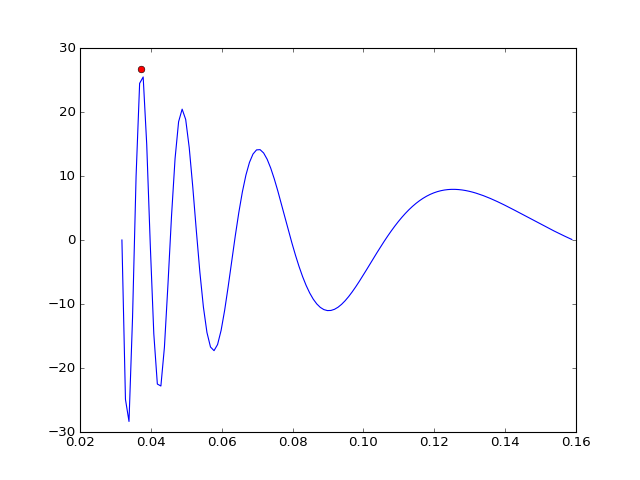

In [19]:
sim()

The best is located at:   0.04887


<IPython.core.display.Javascript object>


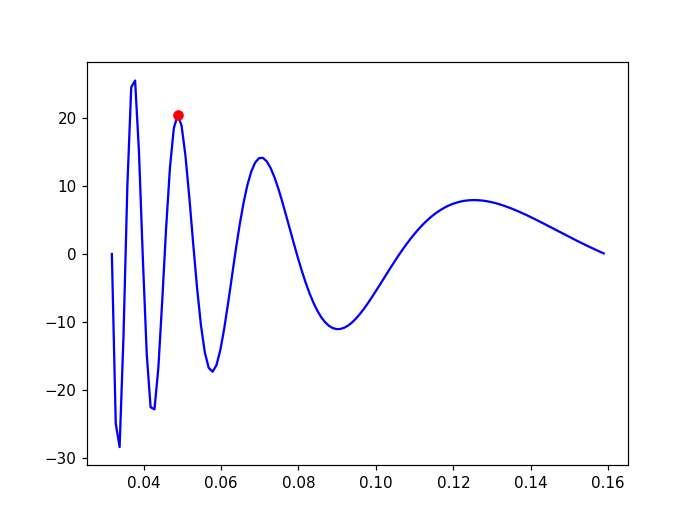

In [5]:
sim()

The best is located at:   0.03726


<IPython.core.display.Javascript object>


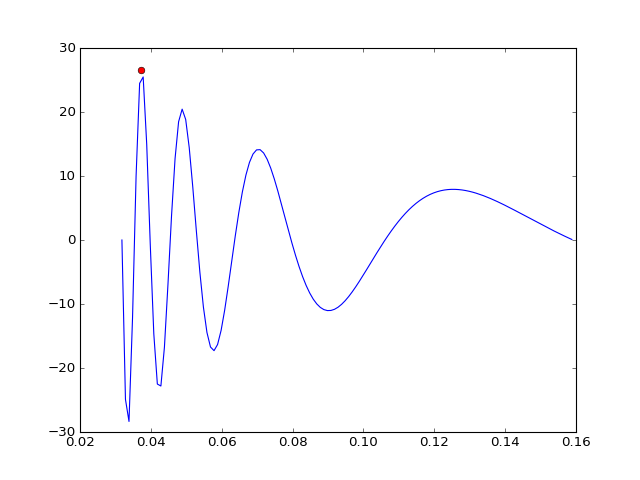

In [6]:
sim()

# 2. Jogo da vida

O *Jogo da vida* ([*Game of life*](http://www.conwaylife.com/)) é um autómato celular, talvez o autómato celular mais conhecido, proposto por John H. Conway em 1970 e popularizado por Martin Gardner na sua coluna da revista *Scientific American*. O jogo, também conhecido por *Life*, é um jogo sem jogadores, cuja evolução é determinada pelo estado inicial. A única interacção com o jogo é através da criação do estado inicial. De seguida, observa-se a sua evolução.

O jogo da vida desenrola-se numa grelha bidimensional infinita de células. Cada uma das células encontra-se num de dois estados possíveis: *viva* ou *morta* e o seu estado  pode mudar em cada passo do jogo (também designado de *geração*), dependendo do estado dos 8 vizinhos dessa célula (as células adjacentes na horizontal, na vertical e na diagonal). A configuração inicial é a primeira geração. A segunda geração resulta da aplicação  das regras de evolução *simultaneamente* a todas as células da grelha, i.e., os nascimentos e mortes ocorrem simultaneamente. Cada uma das gerações seguintes é determinada a partir da geração imediatamente anterior por aplicação das regras de evolução seguintes:
1. se uma célula estiver viva e tiver 2 ou 3 vizinhos, continua viva na geração seguinte;
2. se uma célula estiver viva e tiver menos de 2 vizinhos, morre (de *solidão*);
3. se uma célula estiver viva e tiver mais de 3 vizinhos, morre (de *sobrepopulação*);
4. se uma célua estiver morta e tiver exactamente 3 vizinho, na geração seguinte passa a estar viva.

A evolução termina após um número pré-fixado de iterações.

### Tipos de dados

Adoptamos o tipo de dados *board* para representar o universo do jogo. Existem várias hipóteses para as operações deste tipo de dados. Desde considerar operações atómicas, que manipulam o tabuleiro célula a célula, até operações que implementam cada passo da evolução. Vamos optar por esta última opção. Assim, conseguimos identificar as seguintes operações:
- `set_up(n)`:  operação que recebe como argumento um número natural `n` e cria uma configuração inicial com `n` células distribuídas aleatoriamente na grelha;
- `set_up_from_list(w)`:  operação semelhante à anterior, mas que permite definir a configuração inicial a partir de uma lista de coordenadas `w`;
- `setp()`: operação que executa um passo da evolução;

Embora seja possível fazer a implementação do jogo escolhendo uma representação que considere a dimensão infinita do universo, neste caso, optámos por escolher uma implementação mais simples, com um tabuleiro *finito*, em que se assume que os vizinhos das células na fronteira do tabuleiro, correspondentes a posições fora deste, se encontram mortos. Assim, o  universo do jogo vai ser representado por uma matriz `n x m`, em que `n` é o número de linhas e `m` é o número de colunas.

In [1]:
from pylab import *
from random import randrange

class board:
    def __init__(self, rows, cols):
        self._mat = np.zeros([rows, cols])

    def set_up(self, n):
        rows, cols = shape(self._mat)
        for k in range(n):
            i, j = randrange(rows), randrange(cols)
            self._mat[i,j] = 1.
        return self._mat

    def set_up_from_list(self, pos):
        for (i,j) in pos:
            self._mat[i,j] = 1.
        return self._mat
            
    def step(self):
        
        def neighbours(i,j):
            ii = arange(max(0, i-1), min(rows, i+2))
            jj = arange(max(0, j-1), min(cols, j+2))
            neig = 0
            for r in ii:
                for c in jj:
                    neig = neig + self._mat[r,c]
            return neig - self._mat[i,j]
            
        rows, cols = shape(self._mat)
        new_config = np.zeros([rows, cols])
        for i in arange(rows):
            for j in arange(cols):

                n = neighbours(i, j)
                # se a celula esta viva
                if self._mat[i,j] == 1:
                    if n > 3 or n < 2:
                        new_config[i,j] = 0
                    else:
                        new_config[i,j] = 1
                # se a celula esta morta
                else:
                    if n == 3:
                        new_config[i,j] = 1
                    else:
                        new_config[i,j] = 0
        self._mat = new_config
        return new_config

    def show(self):
        ax = plt.axes()
        ax.matshow(self._mat,cmap=cm.binary)
        ax.set_axis_off()

### Simulador

O simulador é definido por uma função muito simples que recebe 4 argumentos:
- `rows` e `cols`: as dimensões da grelha de simulação;
- `it`: o número de iterações (número de gerações que vamos querer gerar);
- `p`: a população inicial. Se `p` for um número inteiro, gera uma população de `p` indivíduos colocados aleatoriamente na grelha, se `p` for uma lista, gera uma configuração inicial a partir das coordenadas na lista.

A função devolve uma lista contendo cada uma das gerações da simulação. Esta lista irá ser usada em seguida para gerar um filme com a animação da evolução.

In [2]:
def sim(rows, cols, it, p):
    b = board(rows, cols)
    if isinstance(p,int):
        frm=[b.set_up(p)]
    else:
        frm=[b.set_up_from_list(p)]

    i = 1
    while i <= it:
        frm.append(b.step())
        i = i+1
    return frm

In [3]:
w=sim(5,5,5,10)

In [4]:
print(w[0])
print(w[1])
print(w[2])
print(w[3])
print(w[4])
print(w[5])

[[ 0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  1.  1.  1.  0.]
 [ 0.  1.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  0.]
 [ 1.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 0.  0.  1.  0.  0.]
 [ 1.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 1.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.]
 [ 0.  0.  0.  1.  1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.]
 [ 0.  0.  0.  1.  1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


A sequência de matrizes anterior não é suficientemente boa para percebermos a evolução do jogo. Para isso, apresenta-se em seguida um programa que permite *animar* a sequência anterior a partir de uma série de primitivas gráficas cuja descrição omitimos. Este programa não pode ser definido como função (da lista de fotografias da evolução) por razões técnicas, devidamente documentadas. Assim, vamos assumir que o resultado da simulação se encontra sempre guardado numa lista `w`.

<IPython.core.display.Javascript object>


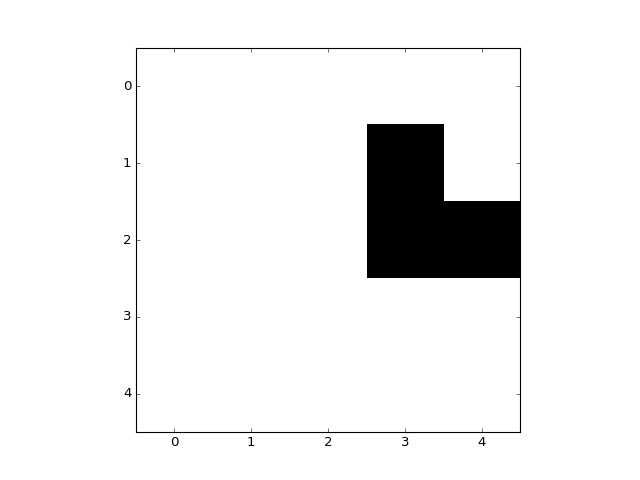

In [5]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def animate(j):
    im.set_array(w[j])
    return im,

fig = plt.figure()
im = plt.imshow(w[0], cmap=cm.binary, interpolation = 'nearest')
    
anim = animation.FuncAnimation(fig, animate, frames=range(len(w)+1), interval=50, blit=True)
plt.show()

Existem alguns padrões interessantes. Por exemplo:

In [6]:
blinker=[(2,1),(2,2),(2,3)]

In [7]:
w=sim(5,5,10,blinker)

<IPython.core.display.Javascript object>


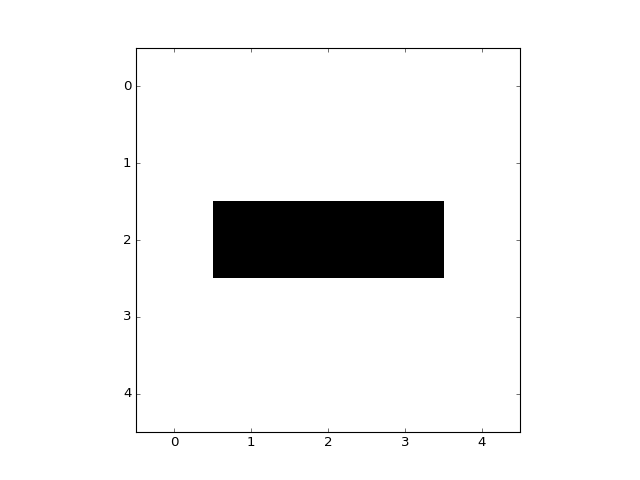

In [8]:
fig = plt.figure()
im = plt.imshow(w[0], cmap=cm.binary, interpolation = 'nearest')
    
anim = animation.FuncAnimation(fig, animate, frames=range(len(w)+1), interval=25, blit=True)
plt.show()

O exemplo seguinte é conhecido como *Gosper glider gun*.

In [9]:
glider=[(1,25),(2,23),(2,25),(3,13),(3,14),(3,21),(3,22),(3,35),(3,36),(4,12),(4,16),(4,21),(4,22),(4,35),(4,36),\
        (5,1),(5,2),(5,11),(5,17),(5,21),(5,22),(6,1),(6,2),(6,11),(6,15),(6,17),(6,18),(6,23),(6,25),\
        (7,11),(7,17),(7,25),(8,12),(8,16),(9,13),(9,14)]

In [10]:
w=sim(30,40,150,glider)

<IPython.core.display.Javascript object>


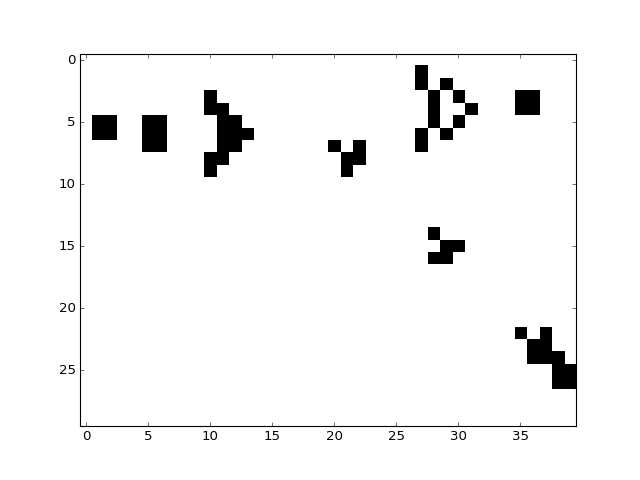

In [11]:
fig = plt.figure()
im = plt.imshow(w[0], cmap=cm.binary, interpolation = 'nearest')
    
anim = animation.FuncAnimation(fig, animate, frames=range(len(w)+1), interval=25, blit=True)
plt.show()

Este e outros exemplos de autómatos celulares e abordagens a paradigmas de *vida artificial* podem ser encontrados no extenso e interessante livro *A new kind of science* de David Wolfram, publicado em 2002.

# 3. Resolução de sudokus

No *Notebook 05* sugeriu-se a implementação de um algoritmo para resolver sudokus incompletos. Neste momento, podemos fazer melhor do que tentar, por força bruta, todas as possibilidades. Atentemos no exemplo abaixo.

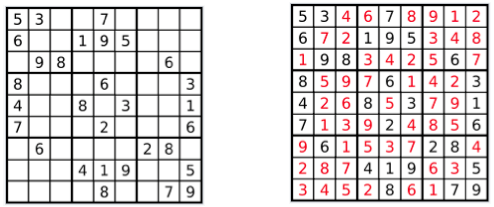

In [1]:
from IPython.display import Image
Image("sudoku.png")

Tal como antes, representemos um problema sudoku incompleto por uma matriz 9 × 9 com entradas 1,2,3,...,9, ou 0, reservando 0 para as entradas em branco do problema. 

A ideia que implementaremos é a seguinte: a cada entrada nula da matriz associamos a lista de possíveis valores para a completar, excluindo desde logo os valores confirmados das entradas dependentes, ou sejam, que ocorram na mesma linha, coluna ou quadrado 3 × 3. Por exemplo, para o problema acima, a entrada `(0,2)` tem como menú de possibilidades `[1,2,4]`. Chamemos a esta informação um *estado*.

De seguida, sucessivamente, escolhemos uma das entradas indefinidas do *estado*, e concretizamo-la, construindo *estados* correspondentes a escolher colocar nessa entrada cada um dos possíveis valores no menú. 

Desta forma, vamos trabalhando com uma lista de estados cada vez mais próximos de uma possível solução. Claro que, pelo caminho, iremos eliminando os estados que correspondam a menús de possibilidades vazios.  

Cada estado é representado por um dicionário com entradas da forma `(i,j):(menu,b)` onde `(i,j)` é uma das posições em branco do problema inicial, `menu` é a lista de valores possíveis que a posição pode tomar, e `b` é um valor Booleano que indica se o `menu` tem um único valor possível cuja informação já foi propagada para as entradas em posições relacionadas (escolhendo-se o valor de uma entrada, esse valor tem de ser excluído dos menus das entradas dependentes). 

In [2]:
def solvedQ(st):
    return all(b for pos,(menu,b) in st.items())

def possibleQ(st):
    return all(len(menu)!=0 for pos,(menu,b) in st.items())

def minmenu(st):
    short=10
    for pos,(menu,b) in st.items():
        if not(b) and len(menu)<short:
            short=len(menu)
            (i,j)=pos
    return (i,j)

def dependentQ(p,q):
    return p[0]==q[0] or p[1]==q[1] or (p[0]//3==q[0]//3 and p[1]//3==q[1]//3)
    
def update(st,x,i,j):
    newst={}
    for pos,(menu,b) in st.items():
        if pos==(i,j):
            newst[pos]=([x],True)
        elif dependentQ(pos,(i,j)) and x in menu:
            newmenu=menu[:]
            newmenu.remove(x)
            newst[pos]=(newmenu,False)
        else:
            newst[pos]=(menu[:],b)
    return newst


As funções auxiliares acima são bastante simples: `solvedQ` verifica se todos os Booleanos do estado `st` são verdadeiros e portanto se foi encontrada uma solução; `possibleQ` verifica se todos os menús do estado `st` são não vazios, e portanto se ainda é possível que dali emane uma solução; `minmenu` determina a entrada do estado `st` que vai ser concretizada, determinando entre as que ainda não têm o Booleano verdadeiro uma a que corresponda um menú o menor possível; `dependentQ` verifica se duas posições são dependentes; `update` é mais envolvida, e também mais importante, pois consiste na construção de um novo *estado* que resulta de concretizar `st` com o valor `x` na posição `(i,j)`, o que implica que essa posição passa a ter menú `[x]`, Booleano verdadeiro, e tendo o cuidado de retirar `x` dos menús de todas as posições dependentes.  

É agora muito fácil implementar a solução.

In [5]:
def sudokusolve(m):
    st={(i,j):(list(range(1,10)),False) for i in range(9) for j in range(9) if m[i][j]==0}
    for i in range(9):
        for j in range(9):
            if m[i][j]!=0:
                st=update(st,m[i][j],i,j)
    stlist=[st]
    found=False
    while not(found) and len(stlist)>0:
        st=stlist.pop()
        if solvedQ(st):
            found=True
        elif possibleQ(st):
            (i,j)=minmenu(st)
            for x in st[(i,j)][0]:
                stlist=stlist+[update(st,x,i,j)]
    if found:
        return st
    else:
        return "impossible"

In [3]:
m=[[5,3,0,0,7,0,0,0,0],[6,0,0,1,9,5,0,0,0],[0,9,8,0,0,0,0,6,0],[8,0,0,0,6,0,0,0,3],[4,0,0,8,0,3,0,0,1],[7,0,0,0,2,0,0,0,6],[0,6,0,0,0,0,2,8,0],[0,0,0,4,1,9,0,0,5],[0,0,0,0,8,0,0,7,9]]
m

[[5, 3, 0, 0, 7, 0, 0, 0, 0],
 [6, 0, 0, 1, 9, 5, 0, 0, 0],
 [0, 9, 8, 0, 0, 0, 0, 6, 0],
 [8, 0, 0, 0, 6, 0, 0, 0, 3],
 [4, 0, 0, 8, 0, 3, 0, 0, 1],
 [7, 0, 0, 0, 2, 0, 0, 0, 6],
 [0, 6, 0, 0, 0, 0, 2, 8, 0],
 [0, 0, 0, 4, 1, 9, 0, 0, 5],
 [0, 0, 0, 0, 8, 0, 0, 7, 9]]

In [11]:
%time sol=sudokusolve(m)
sol

CPU times: user 14.2 ms, sys: 1.68 ms, total: 15.9 ms
Wall time: 14.5 ms


{(0, 2): ([4], True),
 (0, 3): ([6], True),
 (0, 5): ([8], True),
 (0, 6): ([9], True),
 (0, 7): ([1], True),
 (0, 8): ([2], True),
 (1, 1): ([7], True),
 (1, 2): ([2], True),
 (1, 6): ([3], True),
 (1, 7): ([4], True),
 (1, 8): ([8], True),
 (2, 0): ([1], True),
 (2, 3): ([3], True),
 (2, 4): ([4], True),
 (2, 5): ([2], True),
 (2, 6): ([5], True),
 (2, 8): ([7], True),
 (3, 1): ([5], True),
 (3, 2): ([9], True),
 (3, 3): ([7], True),
 (3, 5): ([1], True),
 (3, 6): ([4], True),
 (3, 7): ([2], True),
 (4, 1): ([2], True),
 (4, 2): ([6], True),
 (4, 4): ([5], True),
 (4, 6): ([7], True),
 (4, 7): ([9], True),
 (5, 1): ([1], True),
 (5, 2): ([3], True),
 (5, 3): ([9], True),
 (5, 5): ([4], True),
 (5, 6): ([8], True),
 (5, 7): ([5], True),
 (6, 0): ([9], True),
 (6, 2): ([1], True),
 (6, 3): ([5], True),
 (6, 4): ([3], True),
 (6, 5): ([7], True),
 (6, 8): ([4], True),
 (7, 0): ([2], True),
 (7, 1): ([8], True),
 (7, 2): ([7], True),
 (7, 6): ([6], True),
 (7, 7): ([3], True),
 (8, 0): (

O algoritmo obtido é bastante eficaz, na prática. Será mais fácil verificarmos a bondade da solução obtida visualizando a matriz completa com a ajuda da seguinte função auxiliar.

In [12]:
def fillin(m,st):
    res=[]
    for i in range(9):
        line=[]
        for j in range(9):
            if m[i][j]==0:
                line=line+[st[(i,j)][0][0]]
            else:
                line=line+[m[i][j]]
        res=res+[line]
    return res

In [13]:
fillin(m,sol)

[[5, 3, 4, 6, 7, 8, 9, 1, 2],
 [6, 7, 2, 1, 9, 5, 3, 4, 8],
 [1, 9, 8, 3, 4, 2, 5, 6, 7],
 [8, 5, 9, 7, 6, 1, 4, 2, 3],
 [4, 2, 6, 8, 5, 3, 7, 9, 1],
 [7, 1, 3, 9, 2, 4, 8, 5, 6],
 [9, 6, 1, 5, 3, 7, 2, 8, 4],
 [2, 8, 7, 4, 1, 9, 6, 3, 5],
 [3, 4, 5, 2, 8, 6, 1, 7, 9]]

# 4. Análise de dados e input/output em ficheiros

Neste exemplo, pretende-se extrair alguma informação relevante a partir de ficheiros de dados respeitantes aos utilizadores de uma rede de computadores. À partida é-nos dado um ficheiro "nome" que lista, cronologicamente, todos os logins/logouts de utilizadores ao longo de um dia, no formato dado abaixo

...<br>
in 962 00:04:11<br>
out 114 00:04:17<br>
...

onde se lê que o utilizador 962 entrou no sistema às 0 horas, 4 minutos e 11 segundos, e que 6 segundos depois o utilizador 114 saiu do sistema.

Pretende-se escrever num ficheiro de resultados "lognome" a seguinte informação extraída do ficheiro "nome":

* número de logins em cada intervalo de uma hora,
* número máximo de utilizadores loggedin,
* número médio de logins por utilizador,
* identificação dos utilizadores com mais de 10 logins ao longo do dia,
* identificação dos utilizadores com alguma sessão com duração superior a 12 horas,
* identificação dos utilizadores com alguma sessão instantânea (duração 0).

## Tipos de dados relevantes

O primeiro tipo de dados obviamente relevante que necessitamos de manipular diz respeito à informação horária. 

In [76]:
### one day = 86400 = 24*60*60 seconds
### one hour = 3600 = 60*60 seconds
### one minute = 60 seconds

### datatype - time 
### "hh:mm:ss"

def time2seconds(time):
    h,m,s=time.split(":")
    return int(h)*3600+int(m)*60+int(s)

def seconds2time(n):
    return daytime(n//3600,(n%3600)//60,(n%3600)%60)

def daytime(h,m,s):
    return twoplacestring(h)+":"+twoplacestring(m)+":"+twoplacestring(s)

def hours(time):
    h,m,s=time.split(":")
    return int(h)

def minutes(time):
    h,m,s=time.split(":")
    return int(m)

def seconds(time):
    h,m,s=time.split(":")
    return int(s)

def twoplacestring(n):
    return str(n) if n>9 else "0"+str(n)

De seguida necessitamos de uma estrutura de dados adequada onde possamos representar a informação extraída do ficheiro de dados e que nos permita uma implementação eficiente das funções de análise necessárias. No caso, iremos utilizar *tabelas de dispersão* (*hash tables*), em que a cada chave distinta fica associada uma lista de valores, que implementamos usando dicionários.

In [77]:
## data type - hash table on key
## {key:[entry1,entry2,...,entryn],...]

def emptyhash():
    return {}

def existsQ(hashtable,key):
    return key in hashtable

def add(hashtable,key,entry):
    if not existsQ(hashtable,key):
        hashtable[key]=[entry]
    else:
        hashtable[key]+=[entry]

def numkeys(hashtable):
    return len(hashtable)

def avgentrys(hashtable):
    return sum(len(hashtable[key]) for key in hashtable)/numkeys(hashtable)

def entriesfunctionbykey(hashtable,key,function):
    return function(hashtable[key])

Este tipo de dados é muito genérico, mas aqui usaremos como chaves os identificadores dos utilizadores, associando a cada um deles o registo temporal das suas entradas e saídas.

## Análise dos dados, input e output

O programa principal `analyze` tem uma estrutura simples. Primeiro lê o ficheiro de dados e actualiza as estruturas de dados necessárias em conformidade. De seguida calcula os valores necessários à análise pretendida, recorrendo a algumas funções auxiliares. Finalmente, os resultados são escritos no ficheiro `log`.

In [80]:
### login01athour(h) returns the function fun01 that analyzes a list w of ins/outs of an user 
### and computes her number of logins during the h-th hour 

def login01athour(n):
    def fun01(w):
        if any((act=="in" and n*3600<=time2seconds(time)<=(n+1)*3600) for (act,time) in w):
            return 1
        else:
            return 0
    return fun01

### sessionlengths(w) analyzes the list of ins/outs of an user and computes the length of 
### the longest session by the user, and whether there were instantaneous sessions 

def sessionlengths(w):
    maxim=0
    zero=False
    start=0
    for (act,time) in w:
        timeseconds=time2seconds(time)
        if act=="in":
            start=timeseconds
        elif timeseconds-start>maxim:
            maxim=timeseconds-start
        elif timeseconds==start:
            zero=True
    dayseconds=time2seconds(daytime(24,0,0))
    if act=="in" and dayseconds-start>maxim:
        maxim=dayseconds-start
    return maxim,zero
            
### check(w) analyzes the list of ins/outs of an user and guarantees that it is consistent
### in the sense that time instants are never decreasing and ins/outs alternate
    
def check(w):
    next=["in","out"]
    oldtime=0
    res=True
    for (act,time) in w:
        now=time2seconds(time)
        if res and (not(act in next) or now<oldtime):
            res=False
            print(act,time)
        else:
            next=["out"] if act=="in" else ["in"]
            oldtime=now
    return res

### countins(w) analyzes the list of ins/outs of an user and counts the total number of logins

def countins(w):
    return len([(act,time) for (act,time) in w if act=="in"])

### main function

def analyze(filename):

### initialization 
### empty hash table
### empty list of user ids that have acted so far
### number of loggedin users set to zero
### max number of simultaneously loggedin users set to zero

    data=emptyhash()
    alive=[]
    currentlogins=0
    maxlogins=0
    
### open the file filename for reading
### add each line as an entry to the hash table
### updates other local variables
    
    for line in open(filename,"r"):
        act,usr,time=line.split()
        add(data,int(usr),(act,time))
        if not(usr in alive):
            alive.append(usr)
            if act=="out":
                maxlogins+=1
            else:
                currentlogins+=1
                maxlogins=max(maxlogins,currentlogins)
        else:
            if act=="out":
                currentlogins-=1
            else:
                currentlogins+=1
                maxlogins=max(maxlogins,currentlogins)

### check whether the data for all users is consistent
    
    if any(not entriesfunctionbykey(data,usr,check) for usr in data):
        print("file "+filename+" contains invalid information")
        
    else:
        
### analyze the data        
        
        numloginsbyhour={h:sum(entriesfunctionbykey(data,usr,login01athour(h)) for usr in data) for h in range(24)}
        
        numloginsbyuser={usr:entriesfunctionbykey(data,usr,countins) for usr in data}
    
        avgnumloginsbyuser=sum(numloginsbyuser[usr] for usr in data)/numkeys(data)
    
        manylogins=[usr for usr in data if numloginsbyuser[usr]>10]
    
        lengths={usr:entriesfunctionbykey(data,usr,sessionlengths) for usr in data}
    
        longsessions=[usr for usr in data if lengths[usr][0]>time2seconds(daytime(12,0,0))]
    
        zerosessions=[usr for usr in data if lengths[usr][1]]
        
### creates output logfile
### writes output to log file
        
        logfile=open("log"+filename,"x")
        
        logfile.write("number of logins per hour:\n\n")
        for h in numloginsbyhour:
            logfile.write(twoplacestring(h)+"-"+twoplacestring(h+1)+"h : "+str(numloginsbyhour[h])+"\n")
        
        logfile.write("\n"+"maximum number of users simultaneously logged in: "+str(maxlogins)+"\n")
        
        logfile.write("\n"+"average number of logins per user: "+str(avgnumloginsbyuser)+"\n")
        
        logfile.write("\n"+"users with more than 10 logins during the day:\n\n")
        for usr in manylogins:
            logfile.write(str(usr)+"\n")

        logfile.write("\n"+"users with sessions longer than 12h:\n\n")
        for usr in longsessions:
            logfile.write(str(usr)+"\n")

        logfile.write("\n"+"users with instantaneous sessions:\n\n")
        for usr in zerosessions:
            logfile.write(str(usr)+"\n")
        
        logfile.close()
        
        print ("file "+filename+" analyzed")
        print ("log written in file log"+filename)

Consideremos um ficheiro de dados `serverdata.txt` como se mostra abaixo (incompleto).

In [ ]:
# %load serverdata.txt
in 627 00:00:00
in 750 00:00:32
in 481 00:00:40
in 699 00:00:44
in 226 00:00:50
in 858 00:01:07
in 915 00:01:27
in 125 00:01:42
in 114 00:01:46
in 255 00:01:50
in 315 00:01:58
in 472 00:02:00
in 245 00:03:22
in 610 00:03:26
in 105 00:03:54
in 224 00:04:05
in 962 00:04:11
out 114 00:04:17
out 820 00:04:47
in 333 00:05:03
in 475 00:05:06
out 627 00:05:37
in 324 00:05:39
...

A análise dos dados produz o ficheiro `logserverdata.txt` que se mostra abaixo.

In [84]:
analyze("serverdata.txt")

file serverdata.txt analyzed
log written in file logserverdata.txt


In [ ]:
# %load logserverdata.txt
number of logins per hour:

00-01h : 208
01-02h : 199
02-03h : 152
03-04h : 138
04-05h : 131
05-06h : 113
06-07h : 128
07-08h : 126
08-09h : 131
09-10h : 124
10-11h : 130
11-12h : 118
12-13h : 117
13-14h : 122
14-15h : 129
15-16h : 111
16-17h : 113
17-18h : 114
18-19h : 114
19-20h : 121
20-21h : 131
21-22h : 124
22-23h : 128
23-24h : 115

maximum number of users simultaneously logged in: 478

average number of logins per user: 3.539576365663322

users with more than 10 logins during the day:


users with sessions longer than 12h:

104
118
132
134
160
168
190
228
232
255
273
274
289
331
333
337
338
348
353
370
386
393
410
425
452
458
471
527
528
542
549
578
586
618
634
637
661
670
672
676
761
765
774
785
792
852
863
870
890
898
900
901
905
911
919
944
947
958
977
981
983
987

users with instantaneous sessions:

760


## Apêndice: geração dos ficheiros de dados

O ficheiro de dados `serverdata.txt` foi, na verdade, gerado pelo programa seguinte.

In [94]:
from random import *

def makedatafile(filename,userange,initlogs,instprob,nextfuntime):

### non-existing filename
### userange is (min,max) pair of integers, userids are drawn from the interval
### initlogs is the maximum number of users who were logged in before 00:00:00
### instprob is the probability of an instantaneous action (no time advance)
### nextfuntime is a function of time that returns the average interval to the next action, in seconds
     
    def usernum():
        return randrange(*userange)
    
    f=open(filename,"x")
    logged=list(set(usernum() for i in range(randrange(initlogs))))
    time=0
    proceed=True
    while proceed:
        if random()>instprob:
            time=time+nextfuntime(time)
        if time>86400:
            proceed=False
        else:
            user=usernum()
            if user in logged:
                act="out"
                logged.remove(user)
            else:
                act="in"
                logged.append(user)
            f.write(act+" "+str(user)+" "+seconds2time(time)+"\n")
    f.close()
    print("file "+filename+" was written")

In [92]:
from math import log

def exprandom(m):
    x=random()
    return -m*log(x)

O ficheiro de dados `serverdata.txt` usado acima foi gerado como se descreve a seguir. Obviamente, sendo os dados gerados aleatoriamente, reavaliar a expressão resultará num ficheiro semelhante, mas provavelmente diferente.

In [95]:
makedatafile("serverdata.txt",(700,1000),100,.15,(lambda x:1+1+round(exprandom(abs(43200-x)/360))))

file serverdata.txt was written


Optámos por usar identificadores de utilizador entre 700-999, por limitar a 100 o número de utilizadores ligados no início do dia, por tomar uma probabilidade de 15% de um login de desligar instantaneamente, e uma função de cálculo do intervalo entre eventos no sistema aleatória mas com valores mínimos em volta das 12:00:00 (43200 segundos).

Variando estes parâmetros podem obter-se ficheiros de dados substantivamente diferentes, como no exemplo abaixo.

In [97]:
makedatafile("serverdata2.txt",(100,1000),20,.1,(lambda x:1+int(exprandom(30))))

file serverdata2.txt was written


In [96]:
seconds2time(43200)

'12:00:00'

# 5. O algoritmo de Knuth-Morris-Pratt

Foi discutido nas aulas práticas (notebook EX03) o problema, particularmente importante, de reconhecer padrões em listas de valores, ou *strings*. Nomeadamente, usando *strings*, pretende-se saber se uma palavra, por exemplo "tatu", ocorre num certo texto tipicamente bem mais comprido do que a palavra que se quer pesquisar. 

Não é difícil conceber um algoritmo para resolver este problema, que testa sequencialmente cada uma das possíveis posições da palavra no texto. A questão é que existem algoritmos bem mais eficientes para resolver o problema, o que é determinante para uma actividade que não só fazemos recorrentemente (find?), como tem aplicações muito importantes, por exemplo em biocomputação na pesquisa de cadeias de nucleótidos em moléculas de ADN.

O algoritmo de Knuth-Morris-Pratt (1977) resolve o problema criando a partir da palavra a pesquisar ("tatu") um pequeno modelo a que se chama *autómato finito determinista (afd)*. Um afd é um reconhecedor de palavras, que de seguida é usado para reconhecer o texto dado. Modelos como afds são cruciais na moderna teoria das linguagens, sendo abordados em disciplinas de Teoria da Computação, ou de construção de Compiladores.

## Autómatos finitos deterministas

Um *autómato finito determinista* (afd) é um pequeno modelo de reconhecimento de *strings* formadas por caracteres de um dado alfabeto. Um afd é caracterizado por cinco componentes $A=(\Sigma,Q,\delta,q_0,F)$ onde:
* $\Sigma$ é um alfabeto (conjunto finito de símbolos),
* $Q$ é um conjunto finito de *estados*,
* $\delta:Q\times\Sigma\to Q$ é a função de *transição*,
* $q_0\in Q$ é o *estado inicial*,
* $F\subseteq Q$ é o conjunto de *estados finais*.

Uma palavra sobre o alfabeto é aceite/reconhecida pelo autómato se a palavra faz o autómato transitar do estado inicial para um dos estados finais. É usual representar afds graficamente, como se ilustra abaixo. 

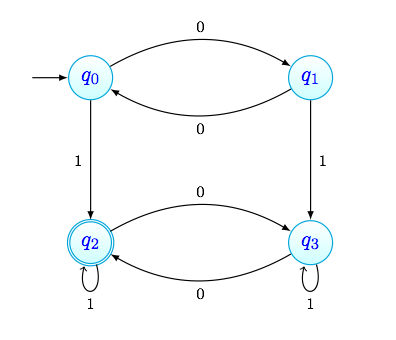

In [99]:
from IPython.display import Image
Image("dfa01.png")

O afd representado aceita/reconhece todas as palavras formadas por 0s e 1s que tenham um número par de 0s e pelo menos um 1. Obviamente o estado inicial $q_0$ está representado pela seta horizontal, o único estado final $q_2$ é representado por uma circunferência dupla.

É relativamente simples representar afds usando um tipo de dados adequado. 

In [103]:
### DFA data type (Sigma,Q,delta,q0,F)
### states 0 ... n, q0=0
### (n+1,Sigma,{(i,s):j,...},Flist)


def emptydfa(nstates,alphabet,final):
    return (nstates,alphabet,{},final)

def addtrans(dfa,i,s,j):
    (nstates,alphabet,delta,final)=dfa
    if i<nstates and j<nstates and s in alphabet:
        delta[(i,s)]=j
    return (nstates,alphabet,delta,final)

def acceptQ(dfa,string):
    (nstates,alphabet,delta,final)=dfa
    i=0
    pos=0
    ok=True
    while ok and pos<len(string):
        s=string[pos]
        if (i,s) in delta:
            i=delta[i,s]
            pos+=1
        else:
            ok=False
    return (ok,pos,i in final)

É relativamente simples representar e simular em *Python* o afd ilustrado acima.

In [105]:
afd=(3,["0","1"],{(0,"0"):1,(0,"1"):2,(1,"0"):0,(1,"1"):3,(2,"0"):3,(2,"1"):2,(3,"0"):2,(3,"1"):3},[2])
acceptQ(afd,"001110"),acceptQ(afd,"0x1110"),acceptQ(afd,"01110")

((True, 6, False), (False, 1, False), (True, 5, True))

Os outputs obtidos indicam que:
* no caso de "001110" a computação decorreu com sucesso, todos os 6 caracteres da palavra foram processados, mas a computação não terminou num estado final pelo que a palavra não é aceite,
* no caso de "0x1110" a computação não decorreu com sucesso e apenas um caracter foi processado com sucesso, já que  o segundo caracter "x" não pertence ao alfabeto escolhido,
* no caso de "01110" tudo correu bem e a palavra foi aceite.

## O algoritmo

O algoritmo de Knuth-Morris-Pratt começa por construir, a partir da palavra a pesquisar, um afd adequado. No caso da palavra "tatu" o afd resultante seria o que se representa abaixo. 

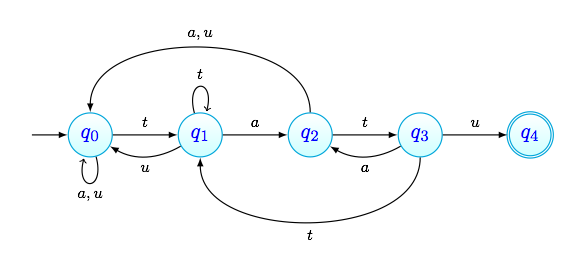

In [109]:
Image("tatu.png")

O afd tem 5 estados, mais um que o comprimento da palavra "tatu". Os estados correspondem aos diferentes estágios da leitura sequencial da palavra:
* $q_0$: nada foi lido,
* $q_1$: foi lido o "t" inicial,
* $q_2$: foi lido "ta",
* $q_3$: foi lido "tat",
* $q_4$: foi lido "tatu" e por isso é um estado final.

Mais interessante é perceber as transições do autómato. Em geral, cada estado representa a leitura de um certo prefixo da palavra. A transição a partir desse estado com cada símbolo do alfabeto leva ao estado que corresponde ao maior prefixo sufixo do que foi lido que de facto seja um prefixo de "tatu". Por exemplo, $\delta(q_3,t)=q_1$ precisamente porque o "t" final de "tatt" corresponde ao maior sufixo que é um prefixo de "tatu". Da mesma forma,  $\delta(q_3,a)=q_2$ precisamente porque o "ta" final de "tata" corresponde ao maior sufixo que é um prefixo de "tatu".

A construção sistemática do afd correspondente a uma dada palavra é simples. O algoritmo de Knuth-Morris-Pratt processa depois o texto usando o afd obtido e procurando chegar ao estado final, recomeçando sempre que seja encontrado um símbolo que não faz parte do alfabeto.

In [120]:
### Knuth-Morris-Pratt

def str2dfa(string):
    nstates=len(string)+1
    alphabet=list(set(string))
    dfa=emptydfa(nstates,alphabet,[nstates-1])
    prefixes={i:string[:i] for i in range(nstates)}
    for i in range(nstates-1):
        for s in alphabet:
            newstring=string[:i]+s
            ok=False
            while not ok:
                if string[:len(newstring)]==newstring:
                    ok=True
                else:
                    newstring=newstring[1:]
            dfa=addtrans(dfa,i,s,len(newstring))
    return dfa

def kmp(string,text):
    dfa=str2dfa(string)
    ok=False
    i=0
    while not ok and i+len(string)<=len(text):
        (dumb,pos,ok)=acceptQ(dfa,text[i:])
        i+=pos+1
    return ok

In [121]:
str2dfa("tatu")

(5,
 ['u', 't', 'a'],
 {(0, 'a'): 0,
  (0, 't'): 1,
  (0, 'u'): 0,
  (1, 'a'): 2,
  (1, 't'): 1,
  (1, 'u'): 0,
  (2, 'a'): 0,
  (2, 't'): 3,
  (2, 'u'): 0,
  (3, 'a'): 2,
  (3, 't'): 1,
  (3, 'u'): 4},
 [4])

In [122]:
kmp("tatu","xyz tttata tu ztatuuutu")

True

In [126]:
from random import *
adn1="".join([choice("ACTG") for i in range(50)])
adn="".join([choice("ACTG") for i in range(1000000)])
adn2=adn[500000:500050]
adn1

'GTCAAGTCTCCTTCGAACCCTATTCTTGCGCTATATTAAGCCACAGCAGG'

In [127]:
kmp(adn1,adn)

False

In [128]:
kmp(adn2,adn)

True

# 6. Árvores binárias de pesquisa


Árvores binárias de pesquisa são estruturas de dados úteis pela grande eficiência da pesquisa de valores nessas árvores. Variações de árvores binárias de pesquisa são utilizadas na implementação de bases de dados. Na sequência apresenta-se primeiro o caso mais simples de árvores contendo apenas valores numéricos mas adiante apresenta-se o caso das árvores binárias de registos numa secção adicional.

A pesquisa em árvores binárias de pesquisa é análoga à pesquisa binária em listas ordenadas (por ordem crescente) e daí vem a sua eficiência. Em ambos os casos procura-se um valor `n` comparando-o com o valor numa posição especial. Se `n` for menor que esse valor prossegue-se a pesquisa com os elementos à esquerda desse valor, se for maior prossegue-se a pesquisa com os elementos à direita desse valor. Assim, de cada vez reduz-se o espaço de pesquisa a metade, o que garante a eficiência do algoritmo. Apresenta-se agora este algoritmo da pesquisa binária em listas ordenadas.

#### Parentesis: pesquisa binária em listas ordenadas

O algoritmo da pesquisa binária em listas é análogo ao da pesquisa em árvores binárias de pesquisa e serve-lhe de motivação. A ideia é simples: se se pretende verificar se um determinado valor n ocorre numa lista ordenada (por ordem crescente) w então pode primeiro verificar-se se n é o elemento que está no meio da lista. Se for a pesquisa pode terminar. Se não for então há que verificar se n se encontra na primeira metade da lista, o que acontece se n for inferior ao elemento que está no meio da lista, ou na segunda metade da lista.

O algoritmo usa uma função auxiliar pesqbinaux(n,w,i,j) com argumentos o valor n que se pretende pesquisar, a lista w onde se pesquisa e as posições i e j de w entre as quais se pretende procurar n. Vamos apresentar uma versão recursiva mas é fácil usar a mesma ideia para codificar uma versão imperativa.

Na versão recursiva compara-se n com o valor na posição m=(i+j)//2, ou seja no meio da lista. Se n for igual a w[m] então o resultado é True. Se não for este o caso e n>w[n] vai procurar-se n entre m+1 e j. Se n<w[m] procura-se n entre i e m-1. Se o elemento não se encontrar na lista o intervalo de posições onde se procura irá sucessivamente diminuindo até ser vazio (i<j).

A função final de pesquisa binária corresponde à pesquisa entre a primeira posição da lista e a última.

In [1]:
def pesqbinaux(n,w,i,j):
    if i>j:
        return False
    else:
        m=(i+j)//2
        if n==w[m]:
            return True
        elif n>w[m]:
            return pesqbinaux(n,w,m+1,j)
        else:
             return pesqbinaux(n,w,i,m-1)

Por exemplo, não é verdade que 3 se encontre na lista [1,3,4,4,7] entre as posições 3 e 4 mas já é verdade que se encontra entre as posições 0 e 4.

In [2]:
pesqbinaux(3,[1,3,4,4,7],3,4)

False

In [3]:
pesqbinaux(3,[1,3,4,4,7],0,4)

True

A função `pesqbin` pretendida corresponde a pesquisar o valor entre a primeira e a última posições da lista.

In [4]:
def pesqbin(n,w):
    return pesqbinaux(n,w,0,len(w)-1)

In [5]:
pesqbin(3,[1,3,4,4,7])

True

In [6]:
pesqbin(5,[1,3,4,4,7])

False

Terminada esta digressão apresenta-se agora  o tipo de dados das árvores binárias. Nota-se que neste notebook se pretende apresentar os conceitos dando  para já preferência à simplicidade da representação e não à sua eficiência. 




### Árvores e árvores binárias

As árvores binárias de pesquisa são árvores binárias que satisfazem uma condição adicional. Árvores são estruturas de dados que consistem de *nós* que se ligam a outros nós ditos seus *descendentes*. Há um nó inicial designado por *raiz* da árvore. Um nó que não tem descendentes diz-se uma *folha*. 

Quando cada nó tem no máximo dois descendentes a árvore diz-se uma *árvore binária*. A figura seguinte representa uma *árvore binária* onde os nós são representados por círculos. Cada nó desta árvore tem exactamente dois descendentes, exceptuando as folhas.

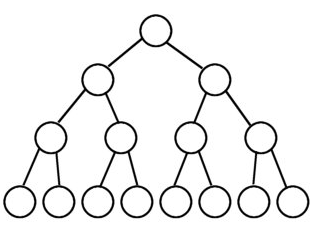

In [7]:
from IPython.display import Image
Image("bt.png")

### Etiquetas

A cada nó de uma árvore pode associar-se um valor, dito *etiqueta* desse nó. Nos exemplos que se seguem a etiqueta será um número inteiro mas em geral poderá ser um valor mais complexo.  É usual neste caso desenhar as árvores só com a etiqueta no lugar de cada nó. Apresenta-se de seguida uma dessas árvores construida com as funções do módulo `bintree` e que serão explicadas adiante.


In [8]:
from searchbintree import *

In [9]:
show(insert(7,insert(6,insert(5,insert(4,insert(3,insert(2,insert(1,empty()))))))))

   4    
 2   6  
1 3 5 7 


### Árvores binárias de pesquisa 

Árvores binárias de pesquisa são árvores etiquetadas que satisfazem a propriedade adicional de a etiqueta de cada nó ser superior às etiquetas na sua subárvore esquerda e inferior às etiquetas na sua subárvore direita. A árvore  anterior é uma árvore binária de pesquisa.
As árvore binárias de pesquisa são portanto árvores binárias que satisfazem esta condição adicional. Antes de considerarmos a sua representação teremos primeiro de escolher uma representação para as árvores binárias.


## Representação de árvores binárias

Um árvore binária é construída à custa da subárvore direita, da etiqueta e da subárvore esquerda. É útil considerar a árvore binária vazia. Por exemplo uma folha é representada como a árvore binária que tem como subárvores esquerda e direita a árvore binária vazia.

A árvore binária vazia é designada por `empty()`. As outras são construídas a partir  da informação  da etiqueta e das subárvores esquerda e direita por `tree(rt,lab,lt)`. As funções `right`, `left` e `label`, dada uma árvore, devolvem a subárvore, direita, esquerda ou a etiqueta, respectivamente. Os predicados  `emptyQ` e `leafQ`, dada uma árvore devolvem True ou False consoante a árvore é vazia ou corresponde a uma folha, respectivamente.

As funções referidas são características das árvores binárias e podem ser usadas para as designar. Em geral, para poderem ser usadas, há que escolher uma representação. Uma primeira opção consiste em usar listas como representação de árvores binárias. Nesta representação teremos que a árvore vazia é a lista vazia e as outras são ternos com a informação da subárvore esquerda, da etiqueta  e da subárvore direita, por esta ordem. Com esta representação é simples escrever as funções referidas acima.

In [10]:
def empty():
    return []
def tree(rt,lab,lt):
    return [rt,lab,lt]

def emptyQ(atree):
    return atree==[]

def leafQ(atree):
    return not emptyQ(atree) and emptyQ(left(atree)) and emptyQ(right(atree))

def left(atree):
    assert not emptyQ(atree) 
    return atree[0] 
def label(atree):
    assert not emptyQ(atree) 
    return atree[1]
def right(atree):
    assert not emptyQ(atree) 
    return atree[2]

Com as operações definidas acima podemos construir árvores binárias. Por exemplo `tree(empty(),5,empty())` será uma folha e `tree(tree(empty(),5,empty()),7,tree(empty(),6,empty()))` uma árvore binária com a raiz etiquetada por 7.


In [11]:
tree(empty(),5,empty())

[[], 5, []]

In [12]:
leafQ(tree(empty(),5,empty()))

True

In [13]:
t1=tree(tree(empty(),5,empty()),7,tree(empty(),6,empty()))

In [14]:
label(t1)

7

In [15]:
label(left(t1))

5

O procedimento show definido adiante em apêndice permite visualizar árvores. 

In [16]:
show(t1)

 7  
5 6 


### Independência de representação

É útil também definir um predicado `isBinTree` que devolve True se o argumento for uma árvore binária. Esta função vai servir de pretexto para duas observações: 

a) em primeiro lugar, como as árvores binárias são constituídas por subárvores (esquerda e direita) é natural definir as funções sobre árvores binárias por recursão, ou seja, o valor da função numa árvore é definido recursivamente à custa do valor da mesma função nas suas subárvores esquerda e direita. Em geral a base é quando a árvore é vazia. Assim,  muitas das funções que iremos apresentar são dessa forma. No entanto, isso não invalida que não existam versões imperativas dessas mesmas funções. 

b) uma segunda observação, que é muito importante, é a seguinte: como vimos podemos definir árvores binárias usando as funções `empty` e `tree`. Por outro lado iremos definir novas funções sobre árvores binárias usando adicionalmente `label`, `right`, `left` e `emptyQ`. Desta forma assegura-se uma propriedade importante das novas funções que é designada **independência de representação**. Neste caso isto significa que se decidirmos alterar a representação ou implementação das árvores, desde que se refaçam as operações agora referidas, não é necessário alterar quase mais nada pois as que foram definidas à custa destas continuarão a funcionar. O leitor poderá verificar ao ler as funções que se seguem que não há nenhuma referência explícita às listas que representam as árvores e que podemos esquecer qual é exactamente a representação escolhida sem que isso nos impeça de definir correctamente novas funções. 

No entanto, a função `isBinTreeQ` é uma das que terá de ser alterada quando mudarmos de representação, pois devolve `True` para esta escolha de representação de árvores e não para outra possível escolha. 


In [17]:
def isBinTreeQ(atree):
    if emptyQ(atree):
        return True
    else:
        return isinstance(atree,list) and len(atree)==3 and isBinTreeQ(left(atree)) and isBinTreeQ(right(atree))

In [18]:
isBinTreeQ(t1)

True

In [19]:
show(t1)

 7  
5 6 


Seguem-se alguns exemplos simples de árvores binárias. 

A árvore seguinte tem `t1` como subárvores esquerda e direita e etiqueta 9.

In [20]:
t2=tree(t1,9,t1)

In [21]:
show(t2)

   9    
 7   7  
5 6 5 6 


E a árvore seguinte tem `t2` como subárvore esquerda e `t1` como subárvore direita e etiqueta 4.

In [22]:
t3=tree(t2,4,t1)
show(t3)

       4        
   9       7    
 7   7   5   6  
5 6 5 6 . . . . 


### Operações úteis

Define-se agora a função `cardinal`  que devolve o número de elementos na lista argumento e, também, a função  `treeMemberQ` que, dado um valor e uma árvore verifica se o valor se encontra na árvore ou não. Esta função será optimizada quando as árvores binárias forem árvores binárias de pesquisa. Nesta versão procura-se o elemento nas subárvores esquerda e direita também enquanto que na versão das  árvores binárias de pesquisa basta procurar numa delas.


In [23]:
def cardinal(atree):
    if emptyQ(atree):
        return 0
    else:
        return 1+ cardinal(left(atree)) + cardinal(right(atree))

In [24]:
cardinal(t2)

7

In [25]:
def treeMemberQ(x,atree):
    if emptyQ(atree):
        return False
    else:
        return x==label(atree) or treeMemberQ(x,left(atree)) or treeMemberQ(x,right(atree))

In [26]:
treeMemberQ(6,t2)

True

### Travessia  de árvores

É útil percorrer uma árvore visitando todos os seus nós. Existem diversas formas sendo as mais frequentes a travessia em profundidade e a travessia em largura.  

No primeiro caso desce-se na árvore preferindo o descendente da esquerda até encontrar uma folha, que é o primeiro nó descoberto (também se diz visitado). No caso de não existir descendente à esquerda segue-se pelo descendente à direita (se existir). Depois repete-se o processo mas ignorando os nós já descobertos (visitados). 

No caso da travessia em largura o primeiro nó a ser descoberto é a raiz, seguindo-se os seus descendentes directos da esquerda para a direita, depois os descendentes destes e assim sucessivamente. O algoritmo para percorrer uma árvore em largura usa uma fila de espera em que vão sendo acrescentados os nós que deverão ser visitados a seguir. O primeiro nó a ser visitado é a raiz, depois os seus descendentes directos da esquerda para a direita e assim sucessivamente.

Segue-se a função `depthfirst` que, dada uma árvore binária, devolve a lista dos seus elementos percorrendo a árvore em profundidade e a função `breadthfirst` que devolve a lista dos elementos percorrendo a árvore em largura. O mesmo algoritmo da travessia da árvore em largura é usado para definir um procedimento `show` que mostra a árvore no ecrã, que está definido em apêndice.



In [27]:
def depthfirst(atree):
    if emptyQ(atree):
        return []
    else:
        return depthfirst(left(atree)) +[label(atree)]+depthfirst(right(atree))

In [28]:
depthfirst(t2)

[5, 7, 6, 9, 5, 7, 6]

In [29]:
def breadthfirst(atree):
    toprocess=[atree]  # fila de espera inicializada com a raiz
    rlist=[]
    while toprocess!=[]:
        presentnode=toprocess[0]
        toprocess=toprocess[1:]
        if not emptyQ(presentnode):
            rlist=rlist+[label(presentnode)] # acrescenta-se a etiqueta do nó actual ao resultado
            toprocess=toprocess+[left(presentnode),right(presentnode)] ##acrescentam-se os descendentes directos  
    return rlist                                                    # do nó actual para serem processaados depois
                                                                    # dos que faltam processar e da esquerda para a direita

In [30]:
breadthfirst(t2)

[9, 7, 7, 5, 6, 5, 6]

## Árvores binárias de pesquisa

Como referido as árvores binárias de pesquisa são árvores binárias etiquetadas que satisfazem a propriedade adicional de a etiqueta de cada nó ser superior às etiquetas na sua subárvore esquerda e inferior às etiquetas na sua subárvore direita, como no exemplo seguinte:

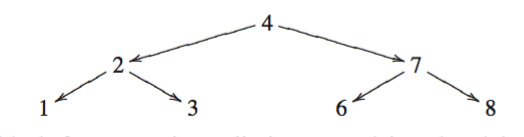

In [31]:
Image("bst.png")

É fácil verificar que o maior elemento na árvore será o que está mais à direita e o menor o que está mais à esquerda. 
Também  é fácil de perceber que a pesquisa pode ser optimizada pois para pesquisar um elemento na árvore haverá primeiro que compará-lo com a etiqueta da raiz. Se for igual foi encontrado. Se não for igual e for menor então só poderá estar  na subárvore esquerda e se for maior só poderá estar na subárvore direita. As funções que devolvem o mínimo e o máximo de uma árvore binária de pesquisa, bem como a versão optimizada da pesquisa são apresentadas de seguida. É também interessante verificar que a travessia em profundidade de uma árvore binária de pesquisa devolve os seus elementos por ordem crescente.


In [32]:
def maximum(atree):
    assert not emptyQ(atree) 
    if emptyQ(right(atree)):
        return label(atree)
    else:
        return maximum(right(atree))

In [33]:
def minimum(atree):
    assert not emptyQ(atree)
    if emptyQ(left(atree)):
        return label(atree)
    else:
        return minimum(left(atree))

In [34]:
def memberQ(x,atree):
    if emptyQ(atree):
        return False
    elif x==label(atree):
        return True
    elif x<label(atree):
        return memberQ(x,left(atree))
    else:
        return memberQ(x,right(atree))

Vamos exemplificar estas funções construindo primeiro a árvore da figura anterior:

In [35]:
leaf1=tree(empty(), 1,empty())
leaf3=tree(empty(), 3,empty())
leaf6=tree(empty(), 6,empty())
leaf8=tree(empty(), 8,empty())

In [36]:
t3=tree(tree(leaf1,2,leaf3),4,tree(leaf6,7,leaf8))

In [37]:
show(t3)

   4    
 2   7  
1 3 6 8 


In [38]:
minimum(t3)

1

In [39]:
maximum(t3)

8

In [40]:
memberQ(3,t3)

True

In [41]:
depthfirst(t3)

[1, 2, 3, 4, 6, 7, 8]

In [42]:
breadthfirst(t3)

[4, 2, 7, 1, 3, 6, 8]

## Inserção e anulamento em árvores binárias de pesquisa

A propriedade que caracteriza uma árvore binária de pesquisa é garantida por operações de inserção e anulamento que asseguram que ao acrescentar ou anular um elemento numa árvore binária de pesquisa o resultado é uma nova árvore binária de pesquisa. Assim, começando pela árvore vazia, sucessivas inserções (e anulações) constroem sempre uma árvore binária de pesquisa. Apresentam-se de seguida essas operações. Mais à frente serão apresentados melhoramentos destas operações.


A função `ins`, dado um valor e uma árvore, devolve a árvore obtida por inserir um nó etiquetado com o valor argumento na árvore dada. O caso base corresponde à inserção de um nó na árvore vazia e tem por resultado uma árvore com um só nó etiquetado pelo elemento argumento e com subárvores esquerda e direita vazias. No passo procura inserir-se correctamente o valor: se for maior que a etiqueta da raiz deverá ser inserido na subárvore direita. No caso contrário deverá ser inserido na subárvore esquerda. A recursão termina quando se encontra uma subárvore vazia.


In [43]:
def ins(x,t):
    if emptyQ(t):
        return tree(empty(),x,empty())
    elif x<label(t):
        return tree(ins(x,left(t)),label(t),right(t))
    else:
        return tree(left(t), label(t), ins(x,right(t)))

In [44]:
t4=ins(5,ins(3,ins(9,ins(4,empty())))) 
show(t4)

   4    
 3   9  
. . 5 . 


A função `delt`, que elimina o nó etiquetado pelo valor argumento (se existir algum nó nessas condições), é descrita de seguida. Nota-se que esta função só elimina um nó com a etiqueta dada e não todos os nós com essa etiqueta. 


O caso base corresponde a eliminar um nó da árvore vazia e é trivial. Quanto ao passo é dividido primeiro em dois casos: ou a etiqueta da raiz é igual ao elemento a eliminar ou não. No segundo caso há que eliminar a etiqueta ou na subárvore esquerda ou na subárvore direita, consoante a comparação entre o elemento e a etiqueta da raiz. No primeiro caso há que eliminar o nó raiz, pois foi encontrada a etiqueta. Este caso é ainda dividido em subcasos.

No primeiro subcaso pretende-se eliminar o nó raiz e a subárvore esquerda é vazia. Claramente o resultado é a subárvore direita. A situação dual de a subárvore direita ser vazia é resolvida de forma semelhante.
Fica por resolver a situação em que se pretende eliminar o nó raiz mas as subárvores esquerda e direita não são vazias. Por exemplo consideremos que se pretende anular o 4 na árvore:

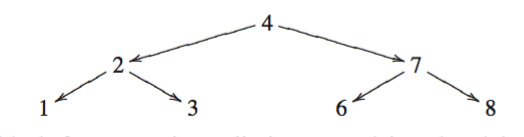

In [45]:
Image("bst.png")

Esta situação é resolvida da forma seguinte: elimina-se o mínimo da subárvore direita e substitui-se a etiqueta do nó raiz por esse mínimo. É importante notar que a subárvore esquerda deste mínimo é vazia pelo que a sua eliminação é um dos casos anteriores.
Note-se que a nova etiqueta da raiz é inferior aos elementos da subárvore direita (pois é o mínimo destes elementos) e é superior aos elementos da subárvore esquerda. Desta forma a anulação de uma árvore binária de pesquisa é ainda uma árvore binária de pesquisa.
Nota-se ainda que, em alternativa, podia ter-se eliminado o nó correspondente ao máximo dos elementos na subárvore esquerda.

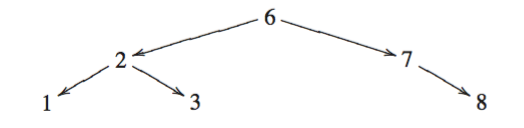

In [46]:
Image("bst2.png")

In [47]:
def delt(x,t):
    if emptyQ(t):
        return t
    elif x<label(t):
        return tree(delt(x,left(t)),label(t),right(t))
    elif x>label(t):
        return tree(left(t), label(t), delt(x,right(t)))
    else:
        if emptyQ(left(t)):
            return right(t)
        elif  emptyQ(right(t)):
            return left(t)
        else:
            mini=minimum(right(t))
            return tree(left(t),mini,delt(mini,right(t)))

Recorde-se a árvore `t3`


In [48]:
show(t3)

   4    
 2   7  
1 3 6 8 


In [49]:
show(delt(4,t3))

   6    
 2   7  
1 3 . 8 


## Árvores binárias de pesquisa equilibradas

A eficiência da pesquisa em árvores binárias de pesquisa aumenta se em cada passo se reduzir o espaço de procura em sensívelmente metade. Isto acontece se à esquerda de cada nó se encontrarem aproximadamente tantos nós como à direita. Ora isto pode não acontecer, por exemplo, quando se inserem os valores por ordem (crescente ou decrescente) como se exemplifica abaixo. 

In [50]:
t5=ins(3,ins(4,ins(5,ins(6,ins(8,ins(10,empty())))) ))

In [51]:
show(t5)

                              10                                
               8                               .                
       6               .               .               .        
   5       .       .       .       .       .       .       .    
 4   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .  
3 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 


A árvore diz-se equilibrada se, para cada nó, a altura da subárvore esquerda difere da altura da subárvore direita em no máximo uma unidade. A altura de uma árvore é o comprimento do maior caminho desde a raiz até uma folha.  A função `height` que dá a altura de uma árvore binária, ou seja, o comprimento do maior caminho desde a raiz a uma folha é apresentada de seguida. É fácil verificar que a altura de uma árvore não vazia é em uma unidade superior à maior das alturas ou da subárvore direita ou esquerda. Por conveniência técnica atribui-se -1 à altura da árvore vazia e assim uma folha terá altura 0. 

Apresenta-se ainda o predicado balancedQ que, dada uma árvore binária, devolve `True` se ela for equilibrada e `False` em caso contrário. 

In [52]:
def height(atree):
    if emptyQ(atree):
        return -1
    else:
        return 1+max(height(right(atree)),height(left(atree)))

In [53]:
def balancedQ(atree):
    if emptyQ(atree):
        return True
    else:
        return abs(height(right(atree))-height(left(atree)))<=1 and balancedQ(right(atree)) and balancedQ(left(atree))

A árvore `t5 ` anterior não é equilibrada pois a diferença entre as alturas das subárvores esquerda e direita é maior que 1.

In [54]:
height(t5), height(left(t5)), height(right(t5))

(5, 4, -1)

In [55]:
balancedQ(t5)

False

### Equilíbrio de árvores binárias 

Evitam-se estas situações corrigindo a árvore, se necessário, quando se introduzem ou apagam etiquetas, uma de cada vez. Após cada introdução ou remoção verifica-se se nalgum nó a diferença entre a altura da subárvore direita e a altura da subárvore esquerda é superior a 1 e corrige-se nesse caso. Note-se que como se introduz ou apaga um nó de cada vez, quando ocorre um desiquilíbrio essa diferença  nunca será maior que 2.


Há quatro casos possíveis designados por LL (esquerda-esquerda), RR (direita-direita), LR (esquerda-direita) e RL (direita-esquerda). Cada caso corresponde a um desiquilíbrio. Por exemplo LL significa que a altura da subárvore esquerda é maior que a da subárvore direita e que nessa subárvore esquerda a subsubárvore esquerda também tem altura maior que a subsubárvore direita. Analogamente RR corresponde ao caso em que a subárvore direita tem altura superior à da subárvore esquerda e por sua vez a subsubárvore direita da subárvore direita tem altura superior à da respectiva subsubárvore esquerda. Os casos RL e LR são semelhantes.

Corrigem-se estes desiquilíbrios transformando uma árvore que exibe o desiquilíbrio numa outra árvore com as mesmas etiquetas mas equilibrada. Essas correcções são sugeridas pelas figuras seguintes onde $\alpha$, $\beta$, $\beta_1$, $\beta_2$ e $\gamma$ representam subárvores e $x$, $y$ e $b$ etiquetas de nós. 

É importante notar que em todos os casos há que garantir que a diferença de alturas diminui e também que as árvores continuam a ser de pesquisa ou seja que a relação entre as etiquetas é garantida. 

Os desiquilíbrios LL e RR são complementares como sugere a figura seguinte. Ou seja, se o desiquilíbrio for LL traduz-se a árvore da esquerda para a da direita e vice versa. 

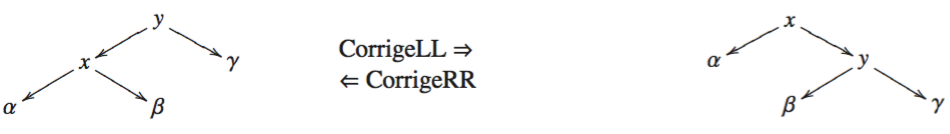

In [56]:
Image("LL-RR.png")

O caso LR corrige-se conforme sugere a figura seguinte.

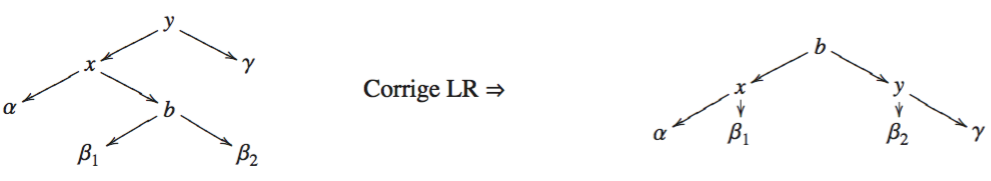

In [57]:
Image("LR.png")

Finalmente o caso RL é semelhante.

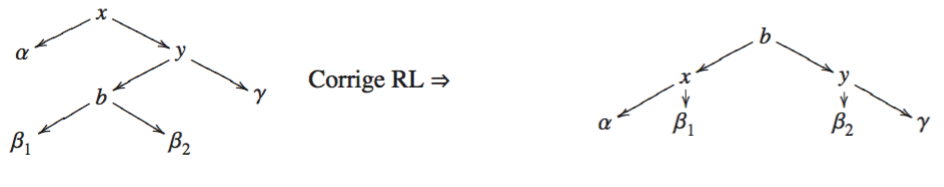

In [58]:
Image("RL.png")

Apresentam-se agora as funções que corrigem cada um dos 4 casos, ou seja, que, dada uma árvore binária de pesquisa com um desiquilíbrio do tipo correspondente devolvem a nova árvore de pesquisa corrigida.

In [59]:
def balanceLL(atree):
    y=label(atree)
    gama=right(atree)
    x=label(left(atree))
    alfa=left(left(atree))
    beta=right(left(atree))
    return tree(alfa, x, tree(beta,y,gama))

In [60]:
def balanceRR(atree):
    x=label(atree)
    alfa=left(atree)
    y=label(right(atree))
    beta=left(right(atree))
    gama=right(right(atree))
    return tree(tree(alfa,x,beta),y,gama)

In [61]:
def balanceLR(atree):
    y=label(atree)
    gama=right(atree)
    x=label(left(atree))
    alfa=left(left(atree))
    b=label(right(left(atree)))
    beta1=left(right(left(atree)))
    beta2=right(right(left(atree)))
    return tree(tree(alfa,x,beta1),b,tree(beta2,y,gama))

In [62]:
def balanceRL(atree):
    x=label(atree)
    alfa=left(atree)
    y=label(right(atree))
    gama=right(right(atree))
    b=label(left(right(atree)))
    beta1=left(left(right(atree)))
    beta2=right(left(right(atree)))
    return tree(tree(alfa,x,beta1),b,tree(beta2,y,gama))

Finalmente, a função `balance` usa as anteriores para  equilibrar um árvore binária de pesquisa. Essa função identifica se há um desiquilíbrio e, se houver, de que tipo é, aplicando de seguida a correcção apropriada. Esta função é recursiva, equilibrando primeiro (recursivamente) as subárvores esquerda e direita antes de equilibrar a árvore argumento.

In [63]:
def balance(atree):
    if emptyQ(atree):
        return atree
    else:
        if balancedQ(left(atree)):
            ltree=left(atree)
        else:
            ltree=balance(left(atree))   
            
        if balancedQ(right(atree)):
            rtree=right(atree)
        else:
            rtree=balance(right(atree))
        if abs(height(ltree)-height(rtree))<=1:
            return tree(ltree,label(atree),rtree)
        elif height(ltree)>height(rtree):
            if height(left(ltree))>height(right(ltree)):
                return balanceLL(atree)
            else:
                return balanceLR(atree)
        else:
            if height(left(rtree))>height(right(rtree)):
                return balanceRL(atree)
            else:
                 return balanceRR(atree)

## Inserção e anulação equilibradas

As funções anteriores permitem definir a inserção e anulação de forma a garantir que as árvores resultantes fiquem equilibradas. Para isso basta equilibrar as árvores resultantes de inserir ou anular um elemento.

In [64]:
def insert(x,atree):
    return balance(ins(x,atree))

In [65]:
def delete(x,atree):
    return balance(delt(x,atree))

Exemplificam-se de seguida estas novas funções. 

In [66]:
t6=insert(3,insert(4,insert(5,insert(6,insert(8,insert(10,empty())))) ))
show(t6)

   5    
 4   8  
3 . 6 10 


In [67]:
balancedQ(t6)

True

In [68]:
t7=delete(3,t6)
show(t7)

   5    
 4   8  
. . 6 10 


In [69]:
t8=delete(4,t7)
show(t8)

   8    
 5  10  
. 6 . . 


Seguem-se mais alguns testes

In [70]:
import random

a=empty()
lista=[]
for i in range(1,100):
    k=random.randrange(1, 100) 
    lista=lista+[k]
    a=insert(k,a)

In [71]:
balancedQ(a)

True

In [72]:
for i in lista:
    a=delt(i,a)

In [73]:
emptyQ(a)

True

## Árvores binárias de pesquisa de registos

As etiquetas das árvores binárias de pesquisa definidas anteriormente são valores que podem ser comparados. Nos exemplos apresentados são números (inteiros). Podem, no entanto, ser outros valores desde que possam ser comparados. Por exemplo, podem ser caracteres ou sequências de caracteres. A ordem que relaciona as `strings `  designa-se por lexicográfica e é a ordem pela qual são apresentadas as palavras dos dicionários ou enciclopédias. Também é possível comparar listas por uma ordem análoga.

In [74]:
'aa'<'ab'

True

In [75]:
[1,2]<[1,2,3]

True

Por esta razão é possível usar as operações anteriores com etiquetas destes tipos.

In [76]:
tstring=insert("actual",insert("antigo", insert("novo", insert("recente",empty()))))

In [77]:
memberQ("novo",tstring)

True

In [78]:
tlist=insert([1,1,1],insert([2,2,2], insert([3,3,3], insert([4,4,4],empty()))))

In [79]:
memberQ([2,2,2],tlist)

True

No entanto, convém considerar um novo tipo de árvores binárias de pesquisa em que a informação a ser guardada em cada nó tem duas componentes: uma é um valor de um tipo comparável, designado por chave na terminologia da base de dados, e que permite a pesquisa rápida e outra que pode ser informação mais complexa e em geral de tipo não comparável, designada por registo. Por exemplo, numa base de dados, a chave poderá ser o número de identificação fiscal de um indivíduo enquanto que o registo é toda a outra informação relativa ao indivíduo com esse número de identificação fiscal. Em geral fazem-se pesquisas (rápidas) pela chave e a árvore binária de pesquisa é ordenada pela chave.

Assim, este novo tipo de árvore é constituído por 4 informações:  uma subárvore esquerda, uma chave que corresponde à antiga etiqueta, uma nova etiqueta que é o registo associado à chave  e a subárvore direita. As operações são muito semelhantes às já apresentadas, havendo apenas que considerar a informação adicional (chave e etiqueta). Dado que se trata de um novo tipo, para não criar confusão, iremos juntar o sufixo `reg` (de registo) aos nomes das operações. 

In [80]:
def emptyreg():
    return []
def treereg(rt,key,lab,lt):
    return [rt,key,lab,lt]

def emptyQreg(atree):
    return atree==[]

def leafQreg(atree):
    return not emptyQreg(atree) and emptyQreg(leftreg(atree)) and emptyQreg(rightreg(atree))

def leftreg(atree):
    assert not emptyQreg(atree) 
    return atree[0] 
def keyreg(atree):
    assert not emptyQreg(atree) 
    return atree[1]
def labelreg(atree):
    assert not emptyQreg(atree) 
    return atree[2]
def rightreg(atree):
    assert not emptyQreg(atree) 
    return atree[3]

Agora o novo predicado `isBinTreeQreg` testa se há 4 componentes na lista.

In [81]:
def isBinTreeQreg(atree):
    if emptyQreg(atree):
        return True
    else:
        return len(atree)==4 and isBinTreeQreg(leftreg(atree)) and isBinTreeQreg(rightreg(atree))

A definição da função `cardinalreg` é análoga à da função cardinal.

In [82]:
def cardinalreg(atree):
    if emptyQreg(atree):
        return 0
    else:
        return 1+ cardinalreg(leftreg(atree)) + cardinalreg(rightreg(atree))

A pesquisa mais relevante para árvores binárias de registos consiste em verificar se uma certa chave se encontra na árvore. Uma primeira versão não optimizada é análoga a `treeMemberQ`.

In [83]:
def treeSearchKeyregQ(x,atree):
    if emptyQreg(atree):
        return False
    else:
        return x==keyreg(atree) or treeSearchKeyregQ(x,leftreg(atree)) or treeSearchKeyregQ(x,rightreg(atree))

O caso das travessias é também análogo ao que já foi visto antes mas com a diferença de se devolver 
para cada nó as duas informações relevantes: a chave e a etiqueta adicional:

In [84]:
def depthfirstreg(atree):
    if emptyQreg(atree):
        return []
    else:
        return depthfirstreg(leftreg(atree)) +[(keyreg(atree),labelreg(atree))]+depthfirstreg(rightreg(atree))

In [85]:
def breadthfirstreg(atree):
    toprocess=[atree] 
    rlist=[]
    while toprocess!=[]:
        presentnode=toprocess[0]
        toprocess=toprocess[1:]
        if not emptyQreg(presentnode):
            rlist=rlist+[(keyreg(presentnode),labelreg(presentnode))] 
            toprocess=toprocess+[leftreg(presentnode),rightreg(presentnode)] 
    return rlist                                                                                                  

Exemplificam-se de seguida estas operações, usando por simplicidade `strings` como registos. Note-se que os registos podem ser qualquer outro valor de tipo mais ou menos complexo.

In [86]:
rt1=treereg(treereg(emptyreg(),5,"Informação de 5",emptyreg()),7,"Informação de 7",treereg(emptyreg(),6,"Informação de 6",emptyreg()))

Usa-se o procedimento showKeysreg descrito em apêndice que só mostra as chaves armazenadas na árvore.

In [87]:
from searchbintreereg import showKeysreg
showKeysreg(rt1)

 7  
5 6 


In [88]:
rt2=treereg(rt1,8,"Informação de 8",rt1)

In [89]:
showKeysreg(rt2)

   8    
 7   7  
5 6 5 6 


In [90]:
breadthfirstreg(rt2)

[(8, 'Informação de 8'),
 (7, 'Informação de 7'),
 (7, 'Informação de 7'),
 (5, 'Informação de 5'),
 (6, 'Informação de 6'),
 (5, 'Informação de 5'),
 (6, 'Informação de 6')]

In [91]:
depthfirstreg(rt2)

[(5, 'Informação de 5'),
 (7, 'Informação de 7'),
 (6, 'Informação de 6'),
 (8, 'Informação de 8'),
 (5, 'Informação de 5'),
 (7, 'Informação de 7'),
 (6, 'Informação de 6')]

In [92]:
cardinalreg(rt2)

7

In [93]:
treeSearchKeyregQ(5,rt2),treeSearchKeyregQ(10,rt2)

(True, False)

### Árvores binárias de pesquisa de registos

As operações apresentadas antes são operações sobre árvores de registos. A partir de agora serão apresentadas novas operações assumindo-se que as árvores estão organizadas pela chave, ou seja, em cada nó a chave é superior às chaves da subárvore esquerda e inferior às da subárvore direita.  A árvore seguinte é uma árvore binária de pesquisa de registos.

In [94]:
rleaf1=treereg(emptyreg(), 1, "Info1",emptyreg())
rleaf3=treereg(emptyreg(), 3, "Info3",emptyreg())
rleaf6=treereg(emptyreg(), 6, "Info6",emptyreg())
rleaf8=treereg(emptyreg(), 8, "Info8",emptyreg())
rt3=treereg(treereg(rleaf1,2, "Info2",rleaf3),4, "Info4",treereg(rleaf6,7, "Info7",rleaf8))

In [95]:
showKeysreg(rt3)

   4    
 2   7  
1 3 6 8 


Define-se agora uma função `minimumreg` que devolve a menor chave e o registo associado à menor chave bem como a função `maximumreg` que devolve a maior chave e o seu registo. 

In [96]:
def minimumreg(atree):
    assert not emptyQreg(atree)
    if emptyQreg(leftreg(atree)):
        return keyreg(atree),labelreg(atree)
    else:
        return minimumreg(leftreg(atree))

In [97]:
def maximumreg(atree):
    assert not emptyQreg(atree)
    if emptyQreg(rightreg(atree)):
        return keyreg(atree),labelreg(atree)
    else:
        return maximumreg(rightreg(atree))

In [98]:
minimumreg(rt3)

(1, 'Info1')

In [99]:
maximumreg(rt3)

(8, 'Info8')

A função de pesquisa por chave é análoga à função `MemberQ` já apresentada:

In [100]:
def keysearchQreg(k,atree):
    if emptyQreg(atree):
        return False
    elif k==keyreg(atree):
        return True
    elif k<keyreg(atree):
        return keysearchQreg(k,leftreg(atree))
    else:
        return keysearchQreg(k,rightreg(atree))

No entanto, é útil devolver o registo associado à chave quando ela se encontra na árvore. 
Na solução seguinte devolve-se `None` quando a chave não se encontra na árvore.   

In [101]:
def keyFindQreg(k,atree):
    if emptyQreg(atree):
        return None
    elif k==keyreg(atree):
        return labelreg(atree)
    elif k<keyreg(atree):
        return keyFindQreg(k,leftreg(atree))
    else:
        return keyFindQreg(k,rightreg(atree))

In [102]:
keysearchQreg(7,rt3)

True

In [103]:
keyFindQreg(7,rt3)

'Info7'

A inserção é também idêntica à versão já apresentada notando que há que comparar pelo valor da chave e considerar também a informação do registo.

In [104]:
def insreg(k,r,t):
    if emptyQreg(t):
        return treereg(emptyreg(),k,r,emptyreg())
    elif k<keyreg(t):
        return treereg(insreg(k,r,leftreg(t)),keyreg(t),labelreg(t),rightreg(t))
    else:
        return treereg(leftreg(t), keyreg(t),labelreg(t), insreg(k,r,rightreg(t)))

In [105]:
showKeysreg(insreg(3,[],rt3))

       4        
   2       7    
 1   3   6   8  
. . . 3 . . . . 


A função que apaga um nó com chave `k` de uma árvore binária é idêntica à já apresentada substituindo `label` por `key`.

In [106]:
def deltreg(x,t):
    if emptyQreg(t):
        return t
    elif x<keyreg(t):
        return treereg(deltreg(x,leftreg(t)),keyreg(t),labelreg(t),rightreg(t))
    elif x>keyreg(t):
        return treereg(leftreg(t), keyreg(t), labelreg(t), deltreg(x,rightreg(t)))
    else:
        if emptyQreg(leftreg(t)):
            return rightreg(t)
        elif  emptyQreg(rightreg(t)):
            return leftreg(t)
        else:
            minkey,minreg=minimumreg(rightreg(t))
            return treereg(leftreg(t),minkey,minreg,deltreg(minkey,rightreg(t)))

In [107]:
rt4=deltreg(4,rt3)

In [108]:
showKeysreg(rt4)

   6    
 2   7  
1 3 . 8 


A altura de uma árvore binária de registos é dada pela mesma função já apresentada e o mesmo se passa com o predicado que verifica se uma árvore está equilibrada.

In [109]:
def heightreg(atree):
    if emptyQreg(atree):
        return -1
    else:
        return 1+max(heightreg(rightreg(atree)),heightreg(leftreg(atree)))

In [110]:
def balancedQreg(atree):
    if emptyQreg(atree):
        return True
    else:
        return abs(heightreg(rightreg(atree))-heightreg(leftreg(atree)))<=1 and balancedQreg(rightreg(atree)) and balancedQreg(leftreg(atree))

As correcções de desequilíbrios são semelhantes ao já apresentado, sendo necessário considerar além das chaves, as etiquetas.


In [111]:
def balanceLLreg(atree):
    yk=keyreg(atree)
    yr=labelreg(atree)
    gama=rightreg(atree)
    xk=keyreg(leftreg(atree))
    xr=labelreg(leftreg(atree))
    alfa=leftreg(leftreg(atree))
    beta=rightreg(leftreg(atree))
    return treereg(alfa, xk,xr, treereg(beta,yk,yr,gama))

In [112]:
def balanceRRreg(atree):
    xk=keyreg(atree)
    xr=labelreg(atree)
    alfa=leftreg(atree)
    yk=keyreg(rightreg(atree))
    yr=labelreg(rightreg(atree))
    beta=leftreg(rightreg(atree))
    gama=rightreg(rightreg(atree))
    return treereg(treereg(alfa,xk,xr,beta),yk,yr,gama)

In [113]:
def balanceLRreg(atree):
    yk=keyreg(atree)
    yr=labelreg(atree)
    gama=rightreg(atree)
    xk=keyreg(leftreg(atree))
    xr=labelreg(leftreg(atree))
    alfa=leftreg(leftreg(atree))
    bk=keyreg(rightreg(leftreg(atree)))
    br=labelreg(rightreg(leftreg(atree)))
    beta1=leftreg(rightreg(leftreg(atree)))
    beta2=rightreg(rightreg(leftreg(atree)))
    return treereg(treereg(alfa,xk,xr,beta1),bk,br,treereg(beta2,yk,yr,gama))

In [114]:
def balanceRLreg(atree):
    xk=keyreg(atree)
    xr=labelreg(atree)
    alfa=leftreg(atree)
    yk=keyreg(rightreg(atree))
    yr=labelreg(rightreg(atree))
    gama=rightreg(rightreg(atree))
    bk=keyreg(leftreg(rightreg(atree)))
    br=labelreg(leftreg(rightreg(atree)))
    beta1=leftreg(leftreg(rightreg(atree)))
    beta2=rightreg(leftreg(rightreg(atree)))
    return treereg(treereg(alfa,xk,xr,beta1),bk,br,treereg(beta2,yk,yr,gama))

In [115]:
def balancereg(atree):
    if emptyQreg(atree):
        return atree
    else:
        if balancedQreg(leftreg(atree)):
            ltree=leftreg(atree)
        else:
            ltree=balancereg(left(atree))              
        if balancedQreg(rightreg(atree)):
            rtree=rightreg(atree)
        else:
            rtree=balancereg(rightreg(atree))
        if abs(heightreg(ltree)-heightreg(rtree))<=1:
            return treereg(ltree,keyreg(atree),labelreg(atree),rtree)
        elif heightreg(ltree)>heightreg(rtree):
            if heightreg(leftreg(ltree))>heightreg(rightreg(ltree)):
                return balanceLLreg(atree)
            else:
                return balanceLRreg(atree)
        else:
            if heightreg(leftreg(rtree))>heightreg(rightreg(rtree)):
                return balanceRLreg(atree)
            else:
                 return balanceRRreg(atree)

Como anteriormente a inserção e remoção equilibradas correspondem a equilibrar a árvore após uma inserção ou remoção.

In [116]:
def insertreg(x,r,atree):
    return balancereg(insreg(x,r,atree))

In [117]:
def deletereg(x,atree):
    return balancereg(deltreg(x,atree))

In [118]:
rt5=insertreg(3,[],insertreg(4,[],insertreg(5,[],insertreg(6,[],insertreg(8,[],insertreg(10,[],empty())))) ))
showKeysreg(rt5)

   5    
 4   8  
3 . 6 10 


In [119]:
rt6=deletereg(3,rt5)
showKeysreg(rt6)

   5    
 4   8  
. . 6 10 


In [120]:
rt7=deletereg(4,rt6)
showKeysreg(rt7)

   8    
 5  10  
. 6 . . 


Alguns testes

In [121]:
a=emptyreg()
lista=[]
for i in range(1,1000):
    k=random.randrange(1, 10000000) 
    lista=lista+[k]
    a=insertreg(k,"Info"+str(i),a)

In [122]:
balancedQreg(a)

True

In [123]:
for i in lista:
    a=deletereg(i,a)

In [132]:
emptyQreg(a)

True

### Sobre os nomes das operações

Não teria sido necessário usar nomes distintos para operações análogas em árvores binárias de pesquisa e em árvores binárias de pesquisa com registos se se pretendesse usar apenas os módulos pois ao importá-los é possível distinguir funções com o mesmo nome de módulos diferentes, como se ilustra de seguida.

In [125]:
import searchbintree as sbt

In [126]:
sbt.empty()

[]

In [127]:
import searchbintreereg as sbtr

In [128]:
sbtr.emptyreg()

[]

Portanto não haveria conflito em usar o mesmo nome para funções de módulos diferentes desde que importados como se ilustrou atrás.

## Apêndice


O procedimento `show`, que mostra uma árvore binária, consiste fundamentalmente no algoritmo de travessia da árvore em largura mas em que além da informação de quais os próximos nós a processar acrescenta para cada nó em que linha irá ser mostrado. Constrói uma lista `lines` com as linhas a ser mostradas. Quando processa um nó acrescenta a etiqueta desse nó na posição correcta da linha correspondente e acrescenta os descendentes para posterior processamento na fila de espera incluindo a informação de que deverão aparecer na linha seguinte.


In [129]:
def show(a):
    h=height(a)
    space=2**(h+1)
    toprocess=[[a,0]] # tree and line number, starting in line 0
    line=0
    lines=["" for i in range(h+2)]  # lines initialized with ""
    while line<=h:
        presentnode=toprocess[0]
        line=presentnode[1]
        toprocess=toprocess[1:]
        if emptyQ(presentnode[0]):
            val='.'
            toprocess=toprocess+[[presentnode[0],presentnode[1]+1],[presentnode[0],presentnode[1]+1]]
        else:
            val=str(label(presentnode[0]))
            toprocess=toprocess+[[left(presentnode[0]),presentnode[1]+1],[right(presentnode[0]),presentnode[1]+1]]
        lspace=space/(2**(line+1))-len(val)
        rspace=space/(2**(line+1))
        lines[presentnode[1]]=lines[presentnode[1]]+" "*int(lspace) + val + " "*int(rspace)
    print ('\n'.join(v for v in lines[:-1])) # print the lines

A função `showKeysreg` é análoga pois só mostra as chaves armazenadas na árvore.

In [130]:
def showKeysreg(a):
    h=heightreg(a)
    space=2**(h+1)
    toprocess=[[a,0]] # tree and line number, starting in line 0
    line=0
    lines=["" for i in range(h+2)]  # lines initialized with ""
    while line<=h:
        presentnode=toprocess[0]
        line=presentnode[1]
        toprocess=toprocess[1:]
        if emptyQreg(presentnode[0]):
            val='.'
            toprocess=toprocess+[[presentnode[0],presentnode[1]+1],[presentnode[0],presentnode[1]+1]]
        else:
            val=str(keyreg(presentnode[0]))
            toprocess=toprocess+[[leftreg(presentnode[0]),presentnode[1]+1],[rightreg(presentnode[0]),presentnode[1]+1]]
        lspace=space/(2**(line+1))-len(val)
        rspace=space/(2**(line+1))
        lines[presentnode[1]]=lines[presentnode[1]]+" "*int(lspace) + val + " "*int(rspace)
    print ('\n'.join(v for v in lines[:-1])) # print the lines